<a href="https://colab.research.google.com/github/armarmarm927/dl_lecture_competition_pub/blob/main/sparkproto8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomAffine([-10,10], scale=(1,1.25)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomErasing(p=0.5,scale=(0.02,0.33),ratio=(0.3,3.3),value=0,inplace=False)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4)

100%|██████████| 170M/170M [00:05<00:00, 31.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [6]:
model_ft = models.resnet50(pretrained=True)
model_ft.fc = nn.Linear(model_ft.fc.in_features, 10)
net = model_ft.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 143MB/s]


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.05)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[100,150], gamma=0.2)

In [9]:
classes = train_dataset.classes

Epoch 1: Loss: 1.8486, Train Accuracy: 30.29%
Test Accuracy: 35.19%
Confusion Matrix (Epoch 1):
[[654  38 156  19  22  11  12  29  55   4]
 [156 489  20 100   7   6  11  75 106  30]
 [109  14 297 101 213 112 102  50   2   0]
 [ 43  11 189 305  50 290  58  53   0   1]
 [ 68  10 168  89 338  92 138  89   7   1]
 [ 21   7 201 159  93 429  19  67   3   1]
 [ 23  17  91 254 141  95 350  25   4   0]
 [ 45   7 114  69 113 171  17 461   1   2]
 [648  76  61  30   4   4   4  14 150   9]
 [249 350  36  74   5  18  14 123  85  46]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 2: Loss: 1.7301, Train Accuracy: 35.11%
Test Accuracy: 41.48%
Confusion Matrix (Epoch 2):
[[519  42  40  12   0  86  21  91 112  77]
 [ 27 503   2  13   0  19  30  49  44 313]
 [114  23 268  15   0 237 164 146  10  23]
 [ 19  22  37 106   0 461 171 142   8  34]
 [ 55  23 233  17   0 109 278 250  12  23]
 [ 14  13  51  56   0 559  77 205   6  19]
 [  5  29  62  52   0 105 640  82   5  20]
 [ 21  12  22   6   0 163  44 681   1  50]
 [284 121  21  10   0  37  18  31 391  87]
 [ 62 246   3  12   0  19  32 112  33 481]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 3: Loss: 1.6494, Train Accuracy: 38.19%
Test Accuracy: 43.41%
Confusion Matrix (Epoch 3):
[[438  45  24  11  25   8  15  14 340  80]
 [ 18 517   0   5   3   0  11  16 126 304]
 [119  24  96  81 258  60 133 112  61  56]
 [ 42  43  36 305  40 123 150 106  44 111]
 [ 60  15  20  49 303  21 205 250  23  54]
 [ 33  28  37 269  67 215  89 164  35  63]
 [  6  34  12  86  82   9 620  61  27  63]
 [ 43   9  10  62  39  40  37 631  16 113]
 [122  88   7  10   8   1   4   5 696  59]
 [ 43 270   0   5   5   0  14  30 113 520]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 4: Loss: 1.6258, Train Accuracy: 39.47%
Test Accuracy: 44.76%
Confusion Matrix (Epoch 4):
[[787  55  12  26   4  11   6  17  54  28]
 [ 88 686   1  14   0   2  17  19  16 157]
 [298  25 236 136  84  92  55  48  11  15]
 [114  34  46 383  18 226  83  68   8  20]
 [155  18 166  91 251  76  79 149   3  12]
 [ 92  18  84 256  17 387  23 107   4  12]
 [ 40  25  59 177 119  58 461  48   7   6]
 [109   7  28  63  40 112  13 586   0  42]
 [410 113   0  38   1   5   6   6 406  15]
 [175 422   1  16   3   2  22  49  17 293]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 5: Loss: 1.5568, Train Accuracy: 42.55%
Test Accuracy: 50.90%
Confusion Matrix (Epoch 5):
[[521  58 102   8   9   9  13  16 227  37]
 [ 19 746   5   9   3   3  17   9  50 139]
 [ 85  22 383  28 193  92  91  63  25  18]
 [ 32  41 113 150  61 241 235  73  23  31]
 [ 44  12 156  20 421  49 169  95  19  15]
 [ 18  19 117 105  80 386 135 108  11  21]
 [  5  21  61  30 110  17 725  17   8   6]
 [ 36  16  35  14 106  80  38 604   3  68]
 [ 79  92  32   6   1   4  13   2 758  13]
 [ 53 423   8  11   4   2  30  29  44 396]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 6: Loss: 1.5025, Train Accuracy: 44.84%
Test Accuracy: 48.42%
Confusion Matrix (Epoch 6):
[[495  36  20   8  17   6  15  30 149 224]
 [  3 618   0   0   1   1  34  11   9 323]
 [124   6 188  21 143 108 133 170  28  79]
 [ 26  23  35 120  27 244 203 199  22 101]
 [ 46   8  40   9 284  28 194 322  10  59]
 [ 23  17  30  66  34 378  55 320  11  66]
 [  3   9  18  36  81  23 727  60  11  32]
 [ 23   7   6  11  25  39  26 747   1 115]
 [ 75 131   6   4   3   1  16   8 611 145]
 [ 10 248   0   2   5   0  31  18  12 674]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 7: Loss: 1.5756, Train Accuracy: 42.58%
Test Accuracy: 51.98%
Confusion Matrix (Epoch 7):
[[484  16 233   3   7  18  12  20 124  83]
 [  8 631  10  12   0  12  15   5  99 208]
 [ 31   5 428  20 123 180 133  34  31  15]
 [  7  14 155 135  34 444 126  26  40  19]
 [ 11   2 192   7 359  94 163 143  17  12]
 [  4   9 105  50  52 647  35  70  16  12]
 [  1   5  75  55  82  72 679  11  17   3]
 [ 10   5  59   6  53 186  17 612   9  43]
 [156  45  43   7   4  11  11   1 696  26]
 [ 26 279  13  17   3  23  15  20  77 527]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 8: Loss: 1.4087, Train Accuracy: 48.55%
Test Accuracy: 51.30%
Confusion Matrix (Epoch 8):
[[761   6  41   3   4   2   7  57  76  43]
 [ 48 413   1   2   5   1  17  25  79 409]
 [135   4 358  24 114  43  70 212  14  26]
 [ 53  10  89 144  44 194 124 284  18  40]
 [ 60   2  97   7 277  11  80 442   6  18]
 [ 27   2  83  65  35 339  24 407   5  13]
 [ 16   5  74  60 122   7 589 101  10  16]
 [ 37   2  11   7  25  30   2 864   2  20]
 [243  32  10   5   4   2   5  17 641  41]
 [ 77  57   4   1   4   0  10  74  29 744]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 9: Loss: 1.3551, Train Accuracy: 51.13%
Test Accuracy: 55.24%
Confusion Matrix (Epoch 9):
[[664  36  52   5   8   1   4   1 210  19]
 [ 10 853   1   3   0   0  12   2  84  35]
 [133  20 464  57  70  44 124  15  63  10]
 [ 22  40 137 301  39 182 162  37  58  22]
 [ 69  18 131  39 410  21 176  83  35  18]
 [ 13  15 128 222  45 384  66  80  31  16]
 [  5  16 115  56  31   7 720   4  37   9]
 [ 67  16  67  44  80  46  20 570  19  71]
 [132  51  12   8   4   1   4   3 780   5]
 [ 47 438   4   9   2   1  14   6 101 378]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 10: Loss: 1.3217, Train Accuracy: 52.51%
Test Accuracy: 55.91%
Confusion Matrix (Epoch 10):
[[737  23  42   0   4   0   7   3 171  13]
 [  8 794   0   0   0   0   6   0 125  67]
 [142  24 471  28  67  39 136  16  69   8]
 [ 62  66 128 176  56 118 207  38 110  39]
 [ 73  13 144   7 438   7 182  82  27  27]
 [ 46  44 135 154  56 324  79  88  52  22]
 [  9  26  57  10  31   4 783   6  58  16]
 [142  29  74  14  83  33  15 528  15  67]
 [111  33   6   1  37   1   5   0 799   7]
 [ 81 265   3   3   4   0   5   1  97 541]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 11: Loss: 1.2850, Train Accuracy: 53.93%
Test Accuracy: 55.11%
Confusion Matrix (Epoch 11):
[[570  17 107   9   9  68   4   6 189  21]
 [  6 796   3  26   4  51  15   2  53  44]
 [ 55   1 483  47  45 286  57   4  17   5]
 [  7   4  37 143  13 756  28   4   6   2]
 [ 18   2 122  54 335 307  86  60  12   4]
 [  4   0  43  23  10 903   3   7   5   2]
 [  1   1  58 240  12 166 515   0   6   1]
 [  9   2  35   3  47 466   4 423   3   8]
 [ 36  51  13  49   1  31   6   2 807   4]
 [ 17 201   5  29   6 106  21  19  60 536]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 12: Loss: 1.2455, Train Accuracy: 55.90%
Test Accuracy: 61.87%
Confusion Matrix (Epoch 12):
[[764  24  30   7  20   4   7  49  70  25]
 [ 16 846   0   7   4   3   7  26  30  61]
 [ 99   3 364  23 237  76  41 133  20   4]
 [ 31  10  63 166  95 369  70 177  10   9]
 [ 28   2  22  14 627  21  24 248   8   6]
 [ 17   5  43  65  73 517  14 261   2   3]
 [  6   7  32  90 188  33 609  29   5   1]
 [ 17   1   6   7  44  34   4 879   2   6]
 [102  42   9  10   8   3   9  13 786  18]
 [ 67 147   3   5   7   5   6 100  31 629]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 13: Loss: 1.2170, Train Accuracy: 56.77%
Test Accuracy: 60.22%
Confusion Matrix (Epoch 13):
[[662   9 124   3   5   0   8   3 171  15]
 [ 12 661   3   1   1   0  14   1 130 177]
 [ 50   4 682  14  42  14 121  14  50   9]
 [ 24  11 244 243  42 112 224  14  73  13]
 [ 27   2 231  14 450  11 198  44  18   5]
 [ 15   5 221 185  48 366  85  41  21  13]
 [  3   6  78  14   9   3 856   1  26   4]
 [ 65   3 142  20 128  32  20 541   6  43]
 [ 37  26  21   1   2   1   7   0 896   9]
 [ 46  56  14   3   1   0  21   2 192 665]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 14: Loss: 1.2447, Train Accuracy: 55.61%
Test Accuracy: 63.15%
Confusion Matrix (Epoch 14):
[[788  33  12   9  13   0   4  20  86  35]
 [ 14 889   0   9   2   0   4   2  10  70]
 [163   3 338  76 205  39  39  93  30  14]
 [ 44  22  49 376 112 191  49 107  26  24]
 [ 54   3  26  37 612   4  23 220   9  12]
 [ 30   8  38 207  98 414   6 183   8   8]
 [ 12  10  34 115 168   5 620  10  16  10]
 [ 33   3  13  31  54  26   0 821   1  18]
 [111  99   3  11   4   0   2   4 736  30]
 [ 43 170   2  11   2   0   2  22  27 721]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 15: Loss: 1.2040, Train Accuracy: 57.27%
Test Accuracy: 60.42%
Confusion Matrix (Epoch 15):
[[794  23  21   3   1   4  12   5  98  39]
 [ 17 811   0   2   0   4   6   1  36 123]
 [164  15 418  27  67  83 156  11  45  14]
 [ 52  34  89 169  12 335 212   8  52  37]
 [ 80  10  58  28 345  45 316  52  35  31]
 [ 25  17  63  97  28 624  85  19  26  16]
 [  8  11  37  30   6  20 849   1  26  12]
 [ 66  12  33  23  77 111  24 560  15  79]
 [194  51   6   7   0   2  11   0 710  19]
 [ 49 115   1   5   0   2   8   0  58 762]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 16: Loss: 1.2886, Train Accuracy: 54.61%
Test Accuracy: 53.91%
Confusion Matrix (Epoch 16):
[[577  19 211  11  11   5  20   8 124  14]
 [ 55 456  11  23   1  17  36  17  41 343]
 [ 55   2 553  36  54  81 189  10  16   4]
 [ 11  13 135 150  27 332 293  17   9  13]
 [ 27   3 119  24 452  38 275  46  11   5]
 [ 11   5 107  65  43 606 132  23   5   3]
 [  3   2  53  22  19  17 877   0   5   2]
 [ 37   2  51  22 177 136  46 509   5  15]
 [ 93  56  53  20   1  10  32   1 721  13]
 [136 131  11  15   4  23  41  78  71 490]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 17: Loss: 1.1719, Train Accuracy: 58.64%
Test Accuracy: 66.19%
Confusion Matrix (Epoch 17):
[[644  15 186  13  18   1  14  10  52  47]
 [ 11 765   6   7   1   3  17   1  31 158]
 [ 38   2 599  21  89  63 161  11  10   6]
 [  6   7 134 218  67 257 267  16  13  15]
 [  7   0 101  13 660  25 142  41   5   6]
 [  7   2  82 115  66 585 105  31   2   5]
 [  1   1  29  21  18  10 907   0   7   6]
 [  9   2  56  19 119  96  23 664   0  12]
 [ 97  23  45  11   6   2  13   1 786  16]
 [ 35  72   7   7  12   2  23  17  34 791]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 18: Loss: 1.1569, Train Accuracy: 59.11%
Test Accuracy: 64.00%
Confusion Matrix (Epoch 18):
[[637  32 116   1  13   1  14  22 134  30]
 [ 23 761   2   3   1   1  14   4  73 118]
 [ 59   8 629  25  69  28 131  28  18   5]
 [ 13  28 185 227  53 199 198  64  19  14]
 [ 20   8 112  17 574   4 170  72  16   7]
 [ 11  12 134 126  47 483  81  92   7   7]
 [  0   6  54  33  14   3 865   4  16   5]
 [ 19   7  62  15  92  37   9 744   2  13]
 [ 56  34  30   5   4   1   9   4 846  11]
 [ 24 229   3  10   5   1  13  34  47 634]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 19: Loss: 1.1605, Train Accuracy: 59.14%
Test Accuracy: 66.49%
Confusion Matrix (Epoch 19):
[[780  52  40  13   6   1   2   9  66  31]
 [ 13 827   0  32   2   2   1   1  11 111]
 [123   7 525  83 103  66  38  25  14  16]
 [ 38  21  87 315  57 325  62  35  21  39]
 [ 60   2  91  35 624  30  27  98  10  23]
 [ 18   8  64 171  44 596  10  63   7  19]
 [ 10   9  39 112 102  11 680   2  17  18]
 [ 59   3  34  24  34  72   0 731   4  39]
 [ 76  62   2   7   6   1   4   0 823  19]
 [ 55 149   1   9   3   0   2   4  29 748]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 20: Loss: 1.0920, Train Accuracy: 61.68%
Test Accuracy: 67.83%
Confusion Matrix (Epoch 20):
[[839   9  17   2  10   0   4   8  91  20]
 [ 29 840   0   0   2   3   5   3  45  73]
 [149   3 509   7 120  33  93  57  22   7]
 [ 52  18 110 129  84 281 186  84  32  24]
 [ 54   4  47   7 660  14 109  91   9   5]
 [ 28   6  68  49  72 550  60 152   8   7]
 [  7   9  37  13  38   8 847  11  21   9]
 [ 47   3  11   8  74  27   9 806   1  14]
 [ 74  22   6   3   6   1   1   2 876   9]
 [ 87 101   1   1   6   1  10  10  56 727]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 21: Loss: 1.0674, Train Accuracy: 62.72%
Test Accuracy: 66.15%
Confusion Matrix (Epoch 21):
[[755  33  40   6   9   1   4  11 105  36]
 [ 14 662   1   7 253   4   3   1  10  45]
 [100   5 555  31 125  49  55  40  29  11]
 [ 35  23 108 289  91 210 108  70  41  25]
 [ 52   4  42  24 709  10  39  86  18  16]
 [ 15   7  59 136  71 547  19 116  17  13]
 [  8   8  46  57  84   2 761   9  19   6]
 [ 33   2  19  21  76  34   2 775   3  35]
 [ 49  55   3   3   5   1   1   2 859  22]
 [ 38 208   1   8   2   1   3   9  27 703]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 22: Loss: 1.2059, Train Accuracy: 57.70%
Test Accuracy: 63.74%
Confusion Matrix (Epoch 22):
[[705  74  58  14   2   2   2   4  56  83]
 [ 15 794   0   8   0   3   2   1  13 164]
 [113   5 590  54  24 128  36  12  14  24]
 [ 36  23  88 202  25 510  50  17  15  34]
 [ 63   6 181  52 444  61  43 108   8  34]
 [ 23   9  52  70  16 772   5  37   3  13]
 [ 13  12  79 131  19  41 677   2   7  19]
 [ 55   4  30  17  22 159   0 646   3  64]
 [159  56  11   6   1   2   1   0 695  69]
 [ 35  87   2  12   0   5   2   1   7 849]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 23: Loss: 1.0897, Train Accuracy: 62.03%
Test Accuracy: 68.13%
Confusion Matrix (Epoch 23):
[[668   5  99  16   6   1   6   6 170  23]
 [ 15 689   3  14   0   1   1   2 109 166]
 [ 45   0 674  76  27  51  70  15  25  17]
 [ 13   4  96 414  33 257  95  35  22  31]
 [ 24   1 183  61 510  20  90  76  19  16]
 [  6   3  62 199  24 616  21  54   4  11]
 [  3   2  42  89  12   8 820   1  16   7]
 [ 32   2  62  52  40  70   5 703   7  27]
 [ 30   4  16  15   2   1   4   2 913  13]
 [ 30  38   3  12   1   1   6   4  99 806]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 24: Loss: 1.2382, Train Accuracy: 57.26%
Test Accuracy: 54.71%
Confusion Matrix (Epoch 24):
[[752  53  61  13  22   1  14   6  60  18]
 [ 92 762   3   8   4   2  13   3  51  62]
 [ 97  30 386  55 200  60 110  33  16  13]
 [ 33  69  86 303  64 169 185  54   9  28]
 [ 67  17  39  24 567  12 113 125  10  26]
 [ 20  21  79 221  55 392  81 113   5  13]
 [  9  34  54  69  84   3 700  10  13  24]
 [ 47  18  27  44  87  53  12 681   0  31]
 [199  92  15  18  13   1  11   3 628  20]
 [ 88 531   2   9  10   0   8   8  44 300]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 25: Loss: 1.1760, Train Accuracy: 58.36%
Test Accuracy: 67.82%
Confusion Matrix (Epoch 25):
[[778  28  69   6  11   0   6  19  33  50]
 [ 22 794   5   8   1   2   9   8  22 129]
 [ 81   3 622  17  91  51  58  48  10  19]
 [ 19  15 135 255  62 288 126  74   8  18]
 [ 36   2  64  38 643   8  63 131   2  13]
 [  8   5  75 104  47 597  47 108   3   6]
 [ 32   3  72  52  52  16 693  12   7  61]
 [ 14   0  27  17  42  38   4 841   2  15]
 [111  45  17   6   3   3   4   6 775  30]
 [ 35 113   3  10   0   0   7  25  23 784]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 26: Loss: 1.1019, Train Accuracy: 61.43%
Test Accuracy: 69.19%
Confusion Matrix (Epoch 26):
[[847  15  60   6   7   4   4  24  17  16]
 [ 32 825   2  10   0   3   3   5  19 101]
 [ 84   3 606  29  54  73  89  53   4   5]
 [ 31  11  88 256  34 375 107  75  11  12]
 [ 42   1  69  42 565  15  77 185   0   4]
 [ 13   6  64  79  23 687  28  95   4   1]
 [  6   6  35 161  25  21 728   7   7   4]
 [ 22   3  23  14  23  47   1 854   1  12]
 [174  23   9   4   3   1   1   3 770  12]
 [ 83  70   2  12   1   2   5  18  26 781]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 27: Loss: 1.0181, Train Accuracy: 64.71%
Test Accuracy: 69.86%
Confusion Matrix (Epoch 27):
[[755  23  60   1  13   1   5  23  72  47]
 [ 13 881   0   2   0   1   5   5  23  70]
 [ 70   4 592  23 114  59  48  66  14  10]
 [ 32  25  95 245  72 277  64 138  29  23]
 [ 21   3  36  17 716   9  37 143   4  14]
 [ 13  11  49  94  58 590   9 162  10   4]
 [  4  13  51 103  86  14 687  22   9  11]
 [ 19   3  13   3  37  27   1 878   1  18]
 [ 66  26   8   6   6   0   3   2 857  26]
 [ 37 119   2   8   0   1   6  17  25 785]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 28: Loss: 1.0109, Train Accuracy: 64.96%
Test Accuracy: 69.89%
Confusion Matrix (Epoch 28):
[[792  49  34   6   4   0   1  10  48  56]
 [  6 953   1   5   0   0   3   1   5  26]
 [123  12 609  70  57  31  38  34   4  22]
 [ 36  35 103 483  36 114  72  75  19  27]
 [ 40   4  91  60 630   4  48 110   4   9]
 [ 12  12  64 241  38 457  17 132   7  20]
 [  6  10  57 197  22   2 690   4   9   3]
 [ 35   7  34  22  25   7   3 818   1  48]
 [ 60  79   4   9   0   0   4   0 824  20]
 [ 25 212   2  10   0   0   5   0  13 733]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 29: Loss: 0.9846, Train Accuracy: 66.06%
Test Accuracy: 71.49%
Confusion Matrix (Epoch 29):
[[821  18  29   7  10   0   3   4  80  28]
 [ 25 831   0   9   0   1   8   2  46  78]
 [118   3 646  33  82  36  42  11  24   5]
 [ 39  10 130 402  76 169  84  32  39  19]
 [ 41   2  75  36 751  13  41  28   8   5]
 [ 26   5  80 192  55 551  18  55  13   5]
 [  7   2  54 122  45   3 746   4  16   1]
 [ 72   1  29  24  90  41   5 720   6  12]
 [ 59  11   7   5   4   0   2   1 901  10]
 [ 60  82   2  11   1   0   6   7  51 780]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 30: Loss: 0.9817, Train Accuracy: 66.01%
Test Accuracy: 69.52%
Confusion Matrix (Epoch 30):
[[773   9  83   3  47   0  14   9  41  21]
 [ 31 836   3  17   1   3  21   4  20  64]
 [ 53   1 643  30  80  43 129  14   6   1]
 [ 14   1 109 330  64 151 283  31  10   7]
 [ 11   0  58  15 713  13 143  44   1   2]
 [  5   1  72 203  65 507 100  46   1   0]
 [  3   1  32 159  14   6 780   2   2   1]
 [ 23   0  29  17  94  51  12 767   3   4]
 [ 78  17  19   5  11   0  20   2 836  12]
 [ 66  62   7  12  14   1  32  10  29 767]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 31: Loss: 0.9668, Train Accuracy: 66.67%
Test Accuracy: 71.82%
Confusion Matrix (Epoch 31):
[[803  17  80   7  14   1   4  13  48  13]
 [ 23 889   5  25   0   5   4   4  15  30]
 [ 57   3 703  28  96  44  33  22   7   7]
 [ 22   9 175 358  78 208  88  50  10   2]
 [ 17   1  50  31 789  10  44  54   4   0]
 [ 13   1 102 136  53 588  16  87   4   0]
 [  3   3  83 184  30  13 682   1   1   0]
 [ 32   3  29  17  55  28   7 824   1   4]
 [ 78  28  26   8   9   1   5   3 831  11]
 [ 64 138   8  24   2   4   7  21  17 715]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 32: Loss: 1.2217, Train Accuracy: 57.97%
Test Accuracy: 67.20%
Confusion Matrix (Epoch 32):
[[806  27  36   8   3   0   8  12  87  13]
 [ 16 925   1   2   0   1   6   2  28  19]
 [108   9 573  40  47  49 115  32  21   6]
 [ 32  40  76 334  33 189 214  48  17  17]
 [ 60   3  77  35 499  12 121 168  10  15]
 [ 19  14  47 196  24 547  61  78   8   6]
 [  8  11  38  62  16   8 843   2  10   2]
 [ 49   9  21  32  19  49   8 782   7  24]
 [ 59  55   2   4   1   0   8   1 866   4]
 [ 60 308   2   5   0   0  10   7  63 545]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 33: Loss: 1.0274, Train Accuracy: 64.54%
Test Accuracy: 71.13%
Confusion Matrix (Epoch 33):
[[720  24  39   5   9   0   4   4 166  29]
 [ 15 886   0   5   0   2   3   1  32  56]
 [ 94   1 654  42  44  27  84   8  40   6]
 [ 32  22 113 470  38 126 130  22  38   9]
 [ 39   3  85  53 626  12 115  44  19   4]
 [ 17   6  92 238  40 520  28  42  14   3]
 [  7   9  45  62   8   4 841   1  22   1]
 [ 35   5  39  51  55  45   9 729   6  26]
 [ 21  30   3   5   1   1   3   0 929   7]
 [ 30 116   5  20   0   0  11   6  74 738]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 34: Loss: 0.9883, Train Accuracy: 65.96%
Test Accuracy: 72.75%
Confusion Matrix (Epoch 34):
[[817  23  39   8  13   1   4  14  52  29]
 [ 15 899   0   8   0   1   2   2  14  59]
 [ 67   4 603  63  80  24 113  13  15  18]
 [ 21  10  69 548  57  55 174  26  13  27]
 [ 21   2  40  42 723   3  92  64   4   9]
 [ 10   9  61 380  58 367  59  45   2   9]
 [  4   3  31  45  14   0 888   1   7   7]
 [ 20   2  30  54  53  26  13 779   2  21]
 [ 54  32   8  17   0   0   5   2 863  19]
 [ 42 119   1  12   1   0   6  13  18 788]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 35: Loss: 0.9364, Train Accuracy: 67.50%
Test Accuracy: 74.44%
Confusion Matrix (Epoch 35):
[[797  14  71   4  12   1   6   4  49  42]
 [ 16 885   2  17   0   2  12   2  14  50]
 [ 51   1 728  28  52  45  64  12   9  10]
 [ 20   1 137 410  53 213 121  27   7  11]
 [ 22   1 100  38 713  14  60  39   6   7]
 [ 10   0  87 155  43 635  29  39   1   1]
 [  5   1  47  40  19   6 874   1   5   2]
 [ 45   2  37  26  59  55  11 738   2  25]
 [ 64  22  18   5   4   1   5   0 862  19]
 [ 27  95   5  21   1   1  16   4  28 802]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 36: Loss: 0.9410, Train Accuracy: 67.77%
Test Accuracy: 68.22%
Confusion Matrix (Epoch 36):
[[766  13  26   3   3   0   2   6 105  76]
 [  7 502   0   7   0   1   0   0  45 438]
 [ 98   5 641  44  56  44  34  25  22  31]
 [ 43  18 103 522  35 128  40  25  12  74]
 [ 47   4  57  61 631  25  30  86   7  52]
 [ 16  13  63 221  25 512  10  62   6  72]
 [  9   9  53 111  17  11 734   3   7  46]
 [ 27   1  22  40  25  36   0 760   2  87]
 [ 62  21   7  11   2   0   0   1 825  71]
 [ 17  18   2   4   0   0   2   0  28 929]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 37: Loss: 1.0570, Train Accuracy: 64.11%
Test Accuracy: 73.73%
Confusion Matrix (Epoch 37):
[[834  23   8   8  17   0   6  14  57  33]
 [ 21 864   0   5   0   1   4   4  19  82]
 [100   6 561  67 100  40  77  21  20   8]
 [ 36  23  51 498  55 155 100  41  22  19]
 [ 19   2  26  56 728  21  72  67   3   6]
 [ 20   6  35 217  38 600  25  48   9   2]
 [  7   5  29  65  18   8 852   3  10   3]
 [ 30   1  19  35  36  66   6 794   2  11]
 [ 60  24   1   9   4   0   7   1 874  20]
 [ 37 128   1  13   1   1   8  19  24 768]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 38: Loss: 0.9413, Train Accuracy: 67.50%
Test Accuracy: 70.53%
Confusion Matrix (Epoch 38):
[[729  32  47   2  13  14   6  11 105  41]
 [  5 940   0   5   0   7   1   2  25  15]
 [ 57   5 659   3  48 142  41  20  18   7]
 [ 21  22  81  84  36 619  73  32  20  12]
 [ 24   2  86   6 632  98  37 101   9   5]
 [  8   7  43  16  24 830  16  45   8   3]
 [  2   6  40  30  23  71 814   3   9   2]
 [ 25   5  16   1  18 111   1 802   2  19]
 [ 34  33   4   3   2   5   3   2 905   9]
 [ 19 254   2   3   1   5   8   5  45 658]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 39: Loss: 0.9050, Train Accuracy: 68.83%
Test Accuracy: 74.74%
Confusion Matrix (Epoch 39):
[[907  11  14   7   6   1   4   9  38   3]
 [ 29 897   1  15   0   3   0   1  30  24]
 [140   3 649  25  76  51  26  20   9   1]
 [ 63  13  85 507  50 167  43  37  26   9]
 [ 44   1  56  33 751  21  24  66   3   1]
 [ 19   6  62 186  43 608   8  54  11   3]
 [ 13   4  72  76  42  11 757   2  23   0]
 [ 52   2  18  14  29  58   2 819   2   4]
 [ 93  15   8   4   1   1   1   1 873   3]
 [118 121   1   5   3   0   1  10  35 706]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 40: Loss: 0.8927, Train Accuracy: 69.53%
Test Accuracy: 73.83%
Confusion Matrix (Epoch 40):
[[713  14 150   8  13   1   3   2  75  21]
 [ 13 879   2  42   0   2   2   0  26  34]
 [ 32   2 783  36  28  13  89   5  11   1]
 [  9   2 141 582  39 117  87   7  10   6]
 [  8   2 130  55 693   3 101   5   1   2]
 [  8   0 133 209  40 564  27  14   3   2]
 [  2   2  47  65  11   6 860   2   4   1]
 [ 27   1 102  54 124  53   6 621   0  12]
 [ 36  17  16   7   1   0   3   1 911   8]
 [ 42 100   3  26   0   0   9   0  43 777]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 41: Loss: 0.8793, Train Accuracy: 69.93%
Test Accuracy: 75.72%
Confusion Matrix (Epoch 41):
[[780  20  86   5  13   3   1  27  40  25]
 [  9 898   3  12   0   3   0   6   8  61]
 [ 32   4 670  28  69  87  49  50   6   5]
 [ 11   5  49 355  65 378  35  79   9  14]
 [  9   1  43  21 751  40  22 108   2   3]
 [  5   1  31  72  33 761   6  85   3   3]
 [  5   3  29  84  65  29 762  14   4   5]
 [  5   1  14   1  22  45   1 903   0   8]
 [ 48  29  16  16   4   2   0   2 862  21]
 [ 26  89   2  11   3   1   0  22  16 830]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 42: Loss: 1.2132, Train Accuracy: 59.09%
Test Accuracy: 50.16%
Confusion Matrix (Epoch 42):
[[588  11  80  57  18   5  14  17 180  30]
 [ 62 399   1  53   2   2  21  19 160 281]
 [ 71   5 323 181 123  82 121  42  34  18]
 [ 23   9  61 433  32 154 181  63  28  16]
 [ 41   5 117  80 346  57 169 152  22  11]
 [ 12   4  70 332  49 297  75 132  19  10]
 [  3   2  42 179  54  44 623  25  16  12]
 [ 34   4  14  80  50  82  29 682   8  17]
 [106  33  11  57   4   1  17   3 730  38]
 [ 59 105   1  56   6   3  36  33 106 595]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 43: Loss: 1.2960, Train Accuracy: 53.85%
Test Accuracy: 67.71%
Confusion Matrix (Epoch 43):
[[881  20  11   5   9   1   4   8  46  15]
 [ 49 817   0   8   0   0   6   3  21  96]
 [150   7 507  45 137  33  69  22  21   9]
 [ 64  26  73 404  70 103 164  35  36  25]
 [ 48   5  20  29 742   4  79  50  16   7]
 [ 39  38  62 296  69 342  57  77  10  10]
 [ 19   7  39  47  30   4 825   5  17   7]
 [ 58   3  11  42  87  28   5 754   4   8]
 [130  41   7   4   4   1   5   1 789  18]
 [ 91 148   2   9   2   0   7   7  24 710]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 44: Loss: 1.0429, Train Accuracy: 63.71%
Test Accuracy: 72.13%
Confusion Matrix (Epoch 44):
[[843  14  34   4   7   1   1   4  45  47]
 [ 13 773   1   4   1   2   0   2  19 185]
 [ 94   1 614  40 100  51  46  19  18  17]
 [ 29  16  97 475  63 178  67  33  14  28]
 [ 32   2  37  42 745  18  37  75   5   7]
 [ 15  36  50 250  47 507  17  55   8  15]
 [ 14   4  53  80  44   7 765   3  15  15]
 [ 27   3  12  27  49  42   1 808   1  30]
 [ 93  22  13   5   4   1   3   1 819  39]
 [ 32  60   3  11   1   0   2   7  20 864]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 45: Loss: 0.9392, Train Accuracy: 67.54%
Test Accuracy: 74.30%
Confusion Matrix (Epoch 45):
[[890  13  22   8  19   0   4   8  30   6]
 [ 43 874   1  12   1   2   4   4  14  45]
 [104   2 654  14  96  45  45  30   7   3]
 [ 29  10 104 422  85 168 112  46  16   8]
 [ 27   1  30  23 811   9  45  51   2   1]
 [ 20  24  58 142  71 581  30  69   3   2]
 [  8   2  42  38  33   8 856   3  10   0]
 [ 32   1  20  17  58  23   6 839   0   4]
 [156  24  15   5   4   1   2   1 786   6]
 [ 97 135   4  13   7   0   2  10  15 717]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 46: Loss: 0.9191, Train Accuracy: 68.82%
Test Accuracy: 74.32%
Confusion Matrix (Epoch 46):
[[822   8  81   3  14   0   0   9  36  27]
 [ 24 865   3   3   0   3   1   2  10  89]
 [ 50   0 766   7  62  49  24  24   8  10]
 [ 23  10 166 300  74 238 101  56  10  22]
 [ 19   2  91   7 770   7  25  69   6   4]
 [ 10   3 102  98  57 601  26  88   3  12]
 [  5   3 105  29  41  12 790   6   4   5]
 [ 33   1  30   5  37  41   1 837   2  13]
 [ 78  26  23   4   2   1   2   2 843  19]
 [ 46  65   3   6   3   1   3   9  26 838]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 47: Loss: 0.8853, Train Accuracy: 69.72%
Test Accuracy: 71.08%
Confusion Matrix (Epoch 47):
[[828  12  54   2   5   3   1  11  61  23]
 [ 15 906   3   2   0   4   3   3  14  50]
 [ 92   3 724   6  53  50  16  40   7   9]
 [ 29  20 150 190  41 422  38  78  13  19]
 [ 34   3 102   7 615  56  32 136   7   8]
 [ 19  26 109  48  28 582  21 147   8  12]
 [  7   5  90  58  39  45 733  12   7   4]
 [ 35   3  22   1   8  44   1 867   2  17]
 [ 57  27  13   3   3   3   2   2 870  20]
 [ 40 119   7   7   0   2   5   4  23 793]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 48: Loss: 0.8646, Train Accuracy: 70.59%
Test Accuracy: 78.01%
Confusion Matrix (Epoch 48):
[[822  18  52   8  21   1   2  23  31  22]
 [  7 888   5  11   1   3   4   6   4  71]
 [ 42   0 712  27  74  72  33  28   7   5]
 [  9   5  64 560  46 207  59  37   5   8]
 [  8   1  41  48 793  21  33  50   3   2]
 [  5  20  37 174  39 651  14  56   2   2]
 [  3   3  35  79  28  16 829   4   2   1]
 [  9   0  14   9  57  49   0 852   1   9]
 [ 75  35  13  13   6   2   5   2 827  22]
 [ 26  56   2  14   6   1   3  13  12 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 49: Loss: 0.9159, Train Accuracy: 69.11%
Test Accuracy: 74.01%
Confusion Matrix (Epoch 49):
[[784  24  50  14   8   7   1  14  71  27]
 [ 11 923   0  13   0   2   2   1  15  33]
 [ 49   3 648  61  55 102  50  12  12   8]
 [ 13   6  59 547  23 256  53  15  13  15]
 [ 15   3  40  82 677  43  45  80   9   6]
 [ 10   4  38 296  27 568  15  33   4   5]
 [  4   8  31  89  15  21 824   1   6   1]
 [ 15   2  21  27  20 134   2 758   1  20]
 [ 50  24  10  11   2   1   1   1 890  10]
 [ 24 126   4  24   0   1   1   6  32 782]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 50: Loss: 0.8574, Train Accuracy: 70.93%
Test Accuracy: 76.58%
Confusion Matrix (Epoch 50):
[[795  19  35  10  22   4   9   5  74  27]
 [ 11 889   1  12   0   2   7   0  32  46]
 [ 59   2 667  32  80  58  79   6   8   9]
 [ 12   2  56 605  53 133 101  10  13  15]
 [ 10   1  29  66 782  14  67  23   5   3]
 [  7   1  34 288  46 561  31  25   4   3]
 [  4   3  19  58  14   8 890   0   3   1]
 [ 21   0  15  42  71  68   6 752   2  23]
 [ 63  12  10   9   2   0   4   0 892   8]
 [ 20  85   2  20   5   1   6   1  35 825]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 51: Loss: 0.8422, Train Accuracy: 71.45%
Test Accuracy: 77.65%
Confusion Matrix (Epoch 51):
[[831  12  35   6  14   1   1  14  54  32]
 [ 14 864   2  13   0   0   0   4  22  81]
 [ 78   2 732  22  82  32  19  18   4  11]
 [ 23   7  89 574  59 152  35  29  13  19]
 [ 20   2  42  46 829  10  10  34   4   3]
 [ 13   4  55 247  56 566   6  47   2   4]
 [  5   2  54  84  47  11 784   3   6   4]
 [ 24   0  16  26  68  35   1 818   1  11]
 [ 57  18   9   7   3   0   0   0 894  12]
 [ 36  48   3  16   1   0   1   3  19 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 52: Loss: 0.8383, Train Accuracy: 71.69%
Test Accuracy: 76.57%
Confusion Matrix (Epoch 52):
[[870  11  30   8  21   4   3   9  32  12]
 [ 25 918   0   5   1   1   0   4  15  31]
 [ 77   2 727  24  61  37  31  30   7   4]
 [ 33  13  58 528  57 161  56  65  15  14]
 [ 19   1  45  32 742  16  25 111   5   4]
 [ 13  26  43 275  43 505  17  72   3   3]
 [  8   2  44  46  30  18 836   5   9   2]
 [ 28   1  12  20  24  40   1 867   0   7]
 [ 89  22   7   5   3   0   2   2 864   6]
 [ 59  98   3   8   1   0   1   4  26 800]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 53: Loss: 0.8425, Train Accuracy: 71.77%
Test Accuracy: 70.26%
Confusion Matrix (Epoch 53):
[[816  16  74  23  13   9   5   6  26  12]
 [ 20 886   4  32   0   7  10   1  14  26]
 [ 45   2 739  23  57  64  62   7   1   0]
 [ 17   2 117 403  29 304 110  12   4   2]
 [ 18   2  92  44 650  46 127  20   1   0]
 [  7  23 102 114  40 633  52  28   1   0]
 [  8   2  66  36   7  20 859   0   2   0]
 [ 25   0  46  12 102 141  11 661   0   2]
 [131  25  32  30   8   3  21   3 745   2]
 [ 60 150   8  61  14  15  20  12  26 634]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 54: Loss: 0.9358, Train Accuracy: 68.02%
Test Accuracy: 77.55%
Confusion Matrix (Epoch 54):
[[798  11  42  11  13   6   4  30  43  42]
 [ 11 898   0   9   0   2   1   4  19  56]
 [ 47   2 727  24  47  59  52  24   6  12]
 [ 14   5  87 494  26 251  57  34  17  15]
 [  9   2  81  52 718  23  51  55   4   5]
 [  8   5  46 169  32 668  17  52   1   2]
 [  4   4  32  85  14  13 839   3   5   1]
 [  7   0  15  17  30  72   1 848   0  10]
 [ 47  15   7  10   0   2   3   1 899  16]
 [ 19  68   2  10   0   0   3  11  21 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 55: Loss: 1.1147, Train Accuracy: 65.37%
Test Accuracy: 32.02%
Confusion Matrix (Epoch 55):
[[357 356  84  50  17  44   0  43  21  28]
 [ 19 680  10 125   1  37   4  34   7  83]
 [ 81  87 235 148 152 212   1  58   8  18]
 [ 17  83 100 342  43 307   5  78   3  22]
 [ 34  45 148  76 314 127   0 219  11  26]
 [ 14  54  79 226  36 479   1  96   4  11]
 [  5  24 140 251 304 140  31  51   2  52]
 [ 18  49  33 117  23 190   2 544   3  21]
 [109 736  21  58   6  10   1  13  17  29]
 [ 27 571   3  86   3  47   3  44  13 203]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 56: Loss: 1.3483, Train Accuracy: 52.61%
Test Accuracy: 68.00%
Confusion Matrix (Epoch 56):
[[791  32  70   5  17   2   8  13  35  27]
 [ 39 704   1  13   4   3   7   7  25 197]
 [ 69   4 644  23  82  61  76  29   6   6]
 [ 22  17 122 306  76 282 114  42   5  14]
 [ 22   4  64  19 675  27  70 105   9   5]
 [ 12   8  63  94  55 632  45  80   1  10]
 [  5   5  56  23  32  17 813   5  10  34]
 [ 19   6  18  11  44  59   7 805   2  29]
 [149  49  20  20   4   3   6   2 722  25]
 [ 57 159   3  20   6   4   4  15  24 708]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 57: Loss: 1.0195, Train Accuracy: 65.25%
Test Accuracy: 72.53%
Confusion Matrix (Epoch 57):
[[873  11  40   1  15   1   4   3  35  17]
 [ 63 827   4  13   2   2   6   1  30  52]
 [ 84   0 746  17  63  41  34   8   3   4]
 [ 32   5 174 397  55 217  73  28   6  13]
 [ 26   1  96  25 751  21  40  36   3   1]
 [ 17   2 132 128  58 600  21  37   0   5]
 [  7  18 106  56  32  10 765   0   4   2]
 [ 40   1  39  15  91  59   7 737   1  10]
 [114  17  22   7   3   1   5   0 824   7]
 [ 98 106   2  17   4   3   4   8  25 733]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 58: Loss: 0.9134, Train Accuracy: 68.97%
Test Accuracy: 74.54%
Confusion Matrix (Epoch 58):
[[822  26 103   4  11   0   3   6  18   7]
 [ 26 919   1   7   0   1   1   2  10  33]
 [ 46   2 734  22 101  40  33  16   4   2]
 [ 30  11 141 515  79 111  72  26   5  10]
 [ 24   1  40  32 800   8  20  71   2   2]
 [ 15   3  80 188  65 564  22  57   2   4]
 [  2  24  55  35  78   5 795   1   4   1]
 [ 37   3  31  24  46  38   0 813   1   7]
 [139  36  26   2   2   1   5   0 780   9]
 [ 75 165   6  12   9   0   2   7  12 712]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 59: Loss: 0.8572, Train Accuracy: 70.91%
Test Accuracy: 77.87%
Confusion Matrix (Epoch 59):
[[849  39   9   7  21   1   0   6  52  16]
 [  7 951   1   7   0   1   0   1   7  25]
 [ 83   5 643  48 102  52  33  15   9  10]
 [ 26  11  38 638  68 141  36  23   8  11]
 [ 16   2  30  34 835  25  15  37   5   1]
 [ 15   3  31 195  52 661   6  34   2   1]
 [  9   6  32 116  47  14 749   1  25   1]
 [ 26   4  11  29  54  52   0 814   2   8]
 [ 42  34   4  10   2   0   1   1 897   9]
 [ 26 181   1  16   0   0   1   4  21 750]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 60: Loss: 0.8370, Train Accuracy: 71.72%
Test Accuracy: 76.05%
Confusion Matrix (Epoch 60):
[[851  21  27   2  13   0   4   7  62  13]
 [ 19 939   1   2   0   1   2   1  17  18]
 [ 62   4 693  11  74  22  98  14  12  10]
 [ 39  14 108 465  55 144 110  28  21  16]
 [ 13   1  32  25 780  12  74  49  13   1]
 [ 18   6  79 112  44 652  30  49   4   6]
 [  5   2  36 112  24  29 777   4   9   2]
 [ 40   2  22   8  47  27   4 836   1  13]
 [ 40  24  11   2   1   0   2   1 912   7]
 [ 40 205   2   8   1   0   2   5  37 700]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 61: Loss: 0.8200, Train Accuracy: 72.34%
Test Accuracy: 77.03%
Confusion Matrix (Epoch 61):
[[824  11  48   2  33   2   3  15  43  19]
 [ 26 799   0  11   1   1   1   4  18 139]
 [ 44   2 695  13 120  28  47  42   6   3]
 [ 17   6  61 506 119 133  76  67   9   6]
 [ 10   1  33  16 864   6  30  39   1   0]
 [  8   4  37 135  96 603  17  93   4   3]
 [  6  55  33  37  56  13 790   5   5   0]
 [ 14   0   7  11  77  18   0 864   1   8]
 [ 47  11  11   7  14   1   0   2 880  27]
 [ 29  33   3  12  10   0   2  14  19 878]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 62: Loss: 0.8050, Train Accuracy: 72.96%
Test Accuracy: 76.90%
Confusion Matrix (Epoch 62):
[[889  16  20   1   8   2   0  13  35  16]
 [ 18 929   1   3   0   4   1   3  13  28]
 [ 82   2 680  16  55  90  27  35   5   8]
 [ 25   9  61 411  39 330  37  62  13  13]
 [ 22   1  42  21 723  46  29 112   2   2]
 [ 15  14  30  65  24 771   6  70   2   3]
 [ 10  88  53  50  26  30 727   9   4   3]
 [ 25   2   8   4  10  45   0 895   2   9]
 [ 67  17   4   6   1   2   0   2 891  10]
 [ 44 133   1   8   0   2   1  12  25 774]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 63: Loss: 0.8258, Train Accuracy: 72.16%
Test Accuracy: 78.37%
Confusion Matrix (Epoch 63):
[[832  20  37   6  13   0   2   2  52  36]
 [ 12 912   1   7   0   0   1   1  11  55]
 [ 61   3 756  29  48  34  40  10  10   9]
 [ 28  12  88 584  43 125  71  21  11  17]
 [ 23   2  58  46 744  14  78  26   2   7]
 [ 15   1  66 188  39 629  19  32   3   8]
 [  8   2  44  73  16   5 839   2   8   3]
 [ 26   1  22  33  57  30   2 796   3  30]
 [ 52  28   4   6   5   0   5   1 878  21]
 [ 19  77   2  12   0   0   5   2  16 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 64: Loss: 0.8000, Train Accuracy: 72.84%
Test Accuracy: 79.35%
Confusion Matrix (Epoch 64):
[[811  10  56   7  15   4   3   9  51  34]
 [ 17 878   0   7   0   1   2   1  17  77]
 [ 42   1 772  10  56  49  34  18   7  11]
 [ 18   9  85 449  58 238  89  25  11  18]
 [  6   2  54  21 826  15  35  34   5   2]
 [  9   1  51 107  56 715  21  33   3   4]
 [  6   2  42  35  24  11 865   5   6   4]
 [ 11   0  16  13  55  50   2 836   2  15]
 [ 56  13   5   6   2   0   4   1 892  21]
 [ 20  41   2  11   3   0   5   3  24 891]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 65: Loss: 0.7792, Train Accuracy: 73.78%
Test Accuracy: 79.27%
Confusion Matrix (Epoch 65):
[[838  15  30   2   8   6   5  10  56  30]
 [ 13 897   0   4   0   5   4   2  14  61]
 [ 58   1 685   8  61  83  60  28   8   8]
 [ 21   5  46 393  45 335  94  30  16  15]
 [ 11   1  31  14 800  39  42  51   7   4]
 [  9   2  26  63  43 776  26  47   6   2]
 [  5   2  26  27  16  23 895   1   5   0]
 [ 12   1   3   4  25  67   2 871   3  12]
 [ 40  20   8   4   1   4   3   1 906  13]
 [ 26  61   2   7   2   1   3   9  23 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 66: Loss: 0.7847, Train Accuracy: 73.42%
Test Accuracy: 77.88%
Confusion Matrix (Epoch 66):
[[871   8  42   2  12   0   3   6  42  14]
 [ 28 861   6  11   0   0   2   3  37  52]
 [ 57   3 819  14  49  10  30  10   6   2]
 [ 28   2 176 459  74 105 102  25  18  11]
 [ 20   1  77  15 827   7  41   8   3   1]
 [ 15   0 138 133  64 585  26  32   6   1]
 [  6   0  72  27  18   5 864   2   6   0]
 [ 34   1  29  19  97  30   1 777   3   9]
 [ 66   6  12   2   1   0   3   1 903   6]
 [ 65  53   2   7   2   0   3   5  41 822]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 67: Loss: 0.7881, Train Accuracy: 73.49%
Test Accuracy: 77.49%
Confusion Matrix (Epoch 67):
[[897  10  20   2   4   2   4   1  52   8]
 [ 19 923   0   4   0   1   1   1  22  29]
 [ 74   2 757  12  28  41  59  11  13   3]
 [ 39   5 134 368  22 274 112  15  23   8]
 [ 41   1  96  27 669  22  98  33  11   2]
 [ 23   5  73  62  22 750  30  24   9   2]
 [ 13   3  46  20   5  14 887   1  11   0]
 [ 55   1  25   7  22  66   1 810   1  12]
 [ 54  10   5   2   0   2   6   1 914   6]
 [ 77  97   2   3   0   2  10   1  34 774]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 68: Loss: 0.7787, Train Accuracy: 73.80%
Test Accuracy: 79.77%
Confusion Matrix (Epoch 68):
[[803  22  41   9   9   3   8   6  64  35]
 [  7 897   0   4   0   0   2   2  10  78]
 [ 41   2 762  22  44  37  52  18  12  10]
 [ 16   7  76 567  38 144 100  25   9  18]
 [ 16   2  52  32 766  10  79  33   6   4]
 [ 11  15  43 170  37 646  30  43   0   5]
 [  7   5  34  43   8   8 884   2   8   1]
 [ 20   0  27  27  31  29   5 849   0  12]
 [ 35  21   6   7   1   0   2   2 907  19]
 [ 25  42   2   6   0   0   5   5  19 896]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 69: Loss: 0.9158, Train Accuracy: 69.81%
Test Accuracy: 76.31%
Confusion Matrix (Epoch 69):
[[840  23  43   7  11   0   2  13  45  16]
 [ 16 915   0  11   1   1   3   1  15  37]
 [ 51   4 665  16  91  63  69  29   7   5]
 [ 15   9  69 491  50 204  87  62   5   8]
 [  7   3  30  32 778  10  56  77   5   2]
 [ 11   3  37 121  50 684  25  67   0   2]
 [  8   4  38  44  28  18 855   2   2   1]
 [ 22   3  21  22  54  34   1 832   1  10]
 [ 62  50  14  15   3   1   8   3 838   6]
 [ 39 167   4  14   0   0   8  12  23 733]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 70: Loss: 0.8615, Train Accuracy: 71.20%
Test Accuracy: 77.13%
Confusion Matrix (Epoch 70):
[[824   7  42   7   8   1   3   2  90  16]
 [ 14 867   6  21   1   5   2   0  44  40]
 [ 51   0 732  24  33  71  71   3  12   3]
 [ 14   1  77 541  18 236  79   9  19   6]
 [ 13   1  66  74 683  43  88  22   6   4]
 [  6   1  56 126  19 751  19  16   4   2]
 [  7   0  36  65   4  24 856   1   7   0]
 [ 38   1  21  43  35 106   5 739   3   9]
 [ 33  10  14  11   1   1   2   0 921   7]
 [ 34  63   7  33   0   8   6   3  47 799]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 71: Loss: 0.7828, Train Accuracy: 73.47%
Test Accuracy: 79.59%
Confusion Matrix (Epoch 71):
[[885  15  24   5  18   1   0   7  29  16]
 [ 13 900   1   7   1   0   0   2   7  69]
 [ 73   0 712  17  86  59  28  13   5   7]
 [ 18  12  71 502  80 219  49  26   8  15]
 [ 14   1  31  25 868  17  19  24   1   0]
 [  9   2  40 106  53 742   5  36   1   6]
 [  8   2  44  46  44  24 822   1   6   3]
 [ 22   1  16  14  48  62   0 829   1   7]
 [ 66  27  11   7   6   1   3   1 847  31]
 [ 37  69   2  11   5   0   2  12  10 852]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 72: Loss: 0.7686, Train Accuracy: 74.15%
Test Accuracy: 79.98%
Confusion Matrix (Epoch 72):
[[926   9  12   2  15   0   0   7  14  15]
 [ 22 902   0   6   0   0   1   3  13  53]
 [ 96   0 716  31  86  26  20  18   1   6]
 [ 30   5  46 627  86  80  52  53   6  15]
 [ 18   1  34  28 860   8  13  36   0   2]
 [ 15   1  39 187  65 611  13  61   2   6]
 [ 14   1  44  56  44   7 827   0   3   4]
 [ 29   0  12  25  54  16   1 856   0   7]
 [111  14   4   7   1   0   3   2 831  27]
 [ 67  60   1   5   1   0   2  11  11 842]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 73: Loss: 0.7474, Train Accuracy: 74.92%
Test Accuracy: 79.83%
Confusion Matrix (Epoch 73):
[[845  14  36   6  10   0   1   6  73   9]
 [ 16 906   1  17   0   1   0   2  17  40]
 [ 54   0 767  24  39  64  19  16  13   4]
 [ 18   6  63 555  34 241  37  20  19   7]
 [ 15   2  61  47 762  42  28  36   6   1]
 [  9   3  40 108  27 770   6  31   3   3]
 [  9   3  57  67  12  27 816   1   7   1]
 [ 26   0  18  22  23  66   0 839   1   5]
 [ 35  16   9  10   2   1   1   1 921   4]
 [ 35  80   2  25   0   0   2   6  48 802]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 74: Loss: 0.7491, Train Accuracy: 74.80%
Test Accuracy: 80.44%
Confusion Matrix (Epoch 74):
[[868  17  16   2   6   0   0   4  62  25]
 [ 11 902   0   0   0   0   2   1  11  73]
 [ 78   2 767  16  38  24  43  13   9  10]
 [ 23  17  78 602  46  85  86  28  19  16]
 [ 31   1  60  25 762  12  54  49   4   2]
 [ 11   4  69 177  41 616  28  43   5   6]
 [  9   6  45  33  18   3 877   4   4   1]
 [ 37   0  21  16  21  25   0 869   1  10]
 [ 36  27   6   2   1   0   4   1 901  22]
 [ 32  54   3   6   0   0   2   6  17 880]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 75: Loss: 0.7404, Train Accuracy: 75.21%
Test Accuracy: 79.20%
Confusion Matrix (Epoch 75):
[[909  16  12   3   6   0   4   5  33  12]
 [ 16 916   1   3   0   0   1   2  13  48]
 [110   0 707  23  34  41  51  18   9   7]
 [ 39  14  69 569  26 134  82  42  12  13]
 [ 26   3  56  31 709  17  96  51   6   5]
 [ 19   8  55 144  30 663  14  61   4   2]
 [ 10   3  53  44   5  12 861   5   7   0]
 [ 32   3  14  14  22  20   3 882   1   9]
 [ 63  24   8   6   1   0   4   2 887   5]
 [ 51  89   4   6   0   0   3   2  28 817]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 76: Loss: 0.7410, Train Accuracy: 75.21%
Test Accuracy: 80.71%
Confusion Matrix (Epoch 76):
[[848  14  21   5   8   0   1   2  77  24]
 [ 13 913   2   6   0   1   1   3  17  44]
 [ 85   0 771  32  41  16  28  15   6   6]
 [ 19   3  73 710  32  67  47  36   7   6]
 [ 29   1  55  46 778   8  28  47   5   3]
 [ 10  10  70 218  33 594   6  54   5   0]
 [  9   1  54  81  18   2 823   3   9   0]
 [ 26   2  24  39  20  18   0 863   2   6]
 [ 32  11   7  12   1   0   1   1 927   8]
 [ 29  64   2  25   0   1   3   5  27 844]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 77: Loss: 0.7436, Train Accuracy: 75.07%
Test Accuracy: 80.41%
Confusion Matrix (Epoch 77):
[[794  12  39  14   6   0   1   3 108  23]
 [ 12 923   2   8   0   1   0   2  22  30]
 [ 43   0 796  23  40  33  31  16  12   6]
 [ 12   3  88 671  26 101  46  24  18  11]
 [ 15   1  55  59 716  17  44  77  14   2]
 [  7   2  50 205  24 664   9  33   3   3]
 [  8   0  48  70  12   5 844   2  11   0]
 [ 15   0  15  35   9  39   0 878   4   5]
 [ 25  11   5  10   0   0   1   2 942   4]
 [ 25  92   3  11   0   0   2   6  48 813]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 78: Loss: 0.7337, Train Accuracy: 75.40%
Test Accuracy: 79.29%
Confusion Matrix (Epoch 78):
[[888  11  13   5   9   0   5   2  51  16]
 [ 17 897   0   5   0   0   5   3  27  46]
 [ 98   0 698  25  32  25  76  28  14   4]
 [ 26   4  46 623  32  78 120  38  24   9]
 [ 31   1  55  40 716  12  99  39   2   5]
 [ 22   3  51 203  29 580  42  61   5   4]
 [  8   1  21  33   6   3 922   1   5   0]
 [ 37   0  11  30  37  10   8 853   4  10]
 [ 62  10   2   5   1   0   5   0 908   7]
 [ 43  61   1   8   0   0   8   4  31 844]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 79: Loss: 0.7348, Train Accuracy: 75.52%
Test Accuracy: 79.79%
Confusion Matrix (Epoch 79):
[[905  23  13   4   9   0   3   4  26  13]
 [ 13 950   0   4   0   0   0   2   5  26]
 [ 83   5 684  28  74  33  71  13   6   3]
 [ 42  18  44 581  59 124  90  20  13   9]
 [ 27   3  24  19 851   9  49  15   2   1]
 [ 20  15  29 159  55 640  30  47   3   2]
 [ 10   3  18  38  22   4 900   2   3   0]
 [ 38   1  15  24  66  26   1 815   3  11]
 [ 90  35   3   6   1   0   3   0 856   6]
 [ 58 116   1   4   2   0   6   1  15 797]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 80: Loss: 1.1887, Train Accuracy: 60.44%
Test Accuracy: 74.35%
Confusion Matrix (Epoch 80):
[[843  20  29   8  10   1   2   6  62  19]
 [ 24 822   1  19   0   1   2   2  57  72]
 [ 76   1 650  44  86  52  53  19  13   6]
 [ 22  13  68 581  51 132  67  39  11  16]
 [ 36   1  33  55 755  14  57  36   6   7]
 [ 12   4  43 243  41 568  19  60   3   7]
 [  6   2  38  99  45   8 780   4  12   6]
 [ 40   3  20  38  43  39   1 795   2  19]
 [ 51  18   5  16   1   0   5   1 896   7]
 [ 58 118   4  18   2   0   2   7  46 745]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 81: Loss: 0.8640, Train Accuracy: 70.56%
Test Accuracy: 78.75%
Confusion Matrix (Epoch 81):
[[885  14  45   4   5   0   1   5  29  12]
 [ 20 905   2  14   0   0   3   2   5  49]
 [ 48   2 828  14  32  34  24  12   4   2]
 [ 24   7 134 492  41 162  93  27   9  11]
 [ 22   1 123  26 735  14  50  24   2   3]
 [ 10   3  93 147  29 645  21  45   1   6]
 [  6   2  76  33   9   9 858   3   3   1]
 [ 33   0  35  26  27  22   2 845   1   9]
 [ 81  25  22   7   1   0   1   0 853  10]
 [ 59  69   6  10   0   0   1  10  16 829]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 82: Loss: 0.7980, Train Accuracy: 73.34%
Test Accuracy: 70.86%
Confusion Matrix (Epoch 82):
[[572 216  83   9  37   2   2  56  22   1]
 [  0 979   2   6   2   1   1   6   1   2]
 [ 23   4 776  13  84  43  27  29   1   0]
 [  2  18  71 507  78 201  69  48   2   4]
 [  4   4  44  21 857  12  23  35   0   0]
 [  2   5  60 111  61 679  16  65   0   1]
 [  1   3  43  38  44  15 847   7   1   1]
 [  1   6  14  10  46  35   2 885   0   1]
 [ 41 146  25   7   7   0  13   3 757   1]
 [  3 696   5  12  11   1   2  32  11 227]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 83: Loss: 0.7502, Train Accuracy: 74.98%
Test Accuracy: 79.59%
Confusion Matrix (Epoch 83):
[[834  10  34   4  21   3   0  12  69  13]
 [ 13 910   4   4   1   1   0   2  39  26]
 [ 50   0 775  10  63  55  19  21   3   4]
 [ 13   7  91 475  51 262  34  43  16   8]
 [  9   1  49  19 828  20  18  51   4   1]
 [  7   3  64  88  41 733   3  55   5   1]
 [  7   0  65  54  35  16 813   5   5   0]
 [ 21   2  17   6  48  42   0 854   4   6]
 [ 25   8   9   5   3   1   3   0 941   5]
 [ 39  99   6   7   0   0   1   8  44 796]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 84: Loss: 0.7345, Train Accuracy: 75.61%
Test Accuracy: 80.69%
Confusion Matrix (Epoch 84):
[[898  16  20   5   9   0   4   4  15  29]
 [ 13 918   0   9   0   0   3   1   3  53]
 [ 63   3 710  14  63  64  59  14   1   9]
 [ 25   7  46 587  61 167  64  26   5  12]
 [ 25   1  35  34 810  23  39  27   3   3]
 [ 15   1  31 131  44 729  18  27   1   3]
 [  8   2  22  50  15  20 878   1   3   1]
 [ 27   4  12  22  44  48   2 827   0  14]
 [ 93  37   4  11   0   0   4   1 824  26]
 [ 24  64   1  11   1   0   2   2   7 888]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 85: Loss: 0.7151, Train Accuracy: 75.92%
Test Accuracy: 81.11%
Confusion Matrix (Epoch 85):
[[844  14  17   8  23   0   3   5  55  31]
 [ 11 901   1  18   2   2   6   2   8  49]
 [ 50   1 764  28  65  28  34  16   9   5]
 [ 19   7  56 683  46  75  72  22  11   9]
 [  6   1  45  45 814   4  50  32   2   1]
 [  9   2  49 221  44 617  19  34   5   0]
 [  6   1  36  46  20   1 881   2   6   1]
 [ 19   1  20  39  44  29   1 837   3   7]
 [ 34  20   1   9   6   0   2   0 903  25]
 [ 14  52   5  29   2   0   5   6  20 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 86: Loss: 0.7088, Train Accuracy: 76.43%
Test Accuracy: 80.07%
Confusion Matrix (Epoch 86):
[[888  19  13   6  16   2   0  14  27  15]
 [  9 958   0   4   0   2   0   2   5  20]
 [ 83   2 672  19  90  53  38  36   2   5]
 [ 20   7  41 515  61 223  50  69   7   7]
 [ 14   1  21  20 858  16  22  44   2   2]
 [  9   2  18 100  48 759  12  49   2   1]
 [  9   4  21  53  45  17 838   8   4   1]
 [ 19   1   5  13  51  27   1 881   0   2]
 [ 71  45   3   9   5   0   5   1 846  15]
 [ 45 122   2  10   5   0   0  10  14 792]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 87: Loss: 0.7103, Train Accuracy: 76.35%
Test Accuracy: 80.67%
Confusion Matrix (Epoch 87):
[[777  11 122   7  16   0   0   5  49  13]
 [ 10 928   6  17   0   1   0   2  13  23]
 [ 15   1 857  27  37  35  12  10   3   3]
 [  8   3  92 646  42 145  30  27   5   2]
 [  4   1  84  35 812  12  17  30   4   1]
 [  5   0  59 169  32 703   7  25   0   0]
 [  6   1  66  71  29   8 815   1   3   0]
 [ 10   3  22  41  39  60   0 820   1   4]
 [ 31  14  17  13   2   1   4   1 911   6]
 [ 31  94   7  34   2   0   1   6  27 798]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 88: Loss: 0.7105, Train Accuracy: 76.28%
Test Accuracy: 81.14%
Confusion Matrix (Epoch 88):
[[828  17  57   6  13   0   1  10  55  13]
 [  8 930   3   8   0   1   0   3  13  34]
 [ 23   2 784  11  79  45  19  26   7   4]
 [ 12   9  64 556  66 181  36  53  11  12]
 [ 13   1  27  24 844  16  14  53   6   2]
 [ 13   2  30 112  42 727   5  63   3   3]
 [  6   2  43  72  59  13 792   3  10   0]
 [ 15   1  10  13  26  20   0 906   2   7]
 [ 32  22   4   5   2   0   2   1 926   6]
 [ 38  92   4   9   1   0   0  10  25 821]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 89: Loss: 0.6986, Train Accuracy: 76.69%
Test Accuracy: 81.12%
Confusion Matrix (Epoch 89):
[[870  15  38   7   6   0   1   6  36  21]
 [ 11 929   0   8   0   0   0   1  11  40]
 [ 37   2 803  36  45  25  31  12   1   8]
 [ 19   4  69 713  34  70  35  27  16  13]
 [ 29   2  59  55 765   8  35  40   5   2]
 [ 12   1  48 247  35 597  13  40   6   1]
 [  4   2  45  86  19   2 835   2   5   0]
 [ 21   2  21  40  28  25   0 846   2  15]
 [ 58  23   5   5   0   0   2   0 896  11]
 [ 28  62   5  16   0   0   1   3  27 858]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 90: Loss: 0.6910, Train Accuracy: 76.84%
Test Accuracy: 81.32%
Confusion Matrix (Epoch 90):
[[902  10  19  10   8   5   0   5  33   8]
 [ 16 886   1   9   0   1   1   2  25  59]
 [ 73   0 732   8  65  81  20  14   6   1]
 [ 23   1  55 566  57 220  41  19  10   8]
 [ 25   1  34  21 832  21  20  40   3   3]
 [ 12   1  23 113  32 766  12  40   1   0]
 [ 11   0  41  45  33  22 838   2   7   1]
 [ 28   0  12  20  25  56   0 847   2  10]
 [ 53   5   5   8   1   1   1   1 914  11]
 [ 57  39   3  17   0   0   2   9  24 849]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 91: Loss: 0.6870, Train Accuracy: 76.90%
Test Accuracy: 79.88%
Confusion Matrix (Epoch 91):
[[870  16  23   3   5   0   3   0  60  20]
 [  8 880   2   4   0   0   1   3  15  87]
 [ 71   4 802  15  33  13  47   5   6   4]
 [ 29  20 103 577  23 123  81   9  21  14]
 [ 45   2  64  32 735  20  84   7   6   5]
 [ 16   4  98 145  23 666  21  20   3   4]
 [ 10   2  40  30   7  10 890   0  11   0]
 [ 47   2  40  30  47  38   4 775   3  14]
 [ 26  15   3   6   0   0   2   0 939   9]
 [ 25  82   1   3   0   0   7   1  27 854]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 92: Loss: 0.8004, Train Accuracy: 73.26%
Test Accuracy: 79.55%
Confusion Matrix (Epoch 92):
[[862  15  37   6   7   0   1   2  53  17]
 [ 21 873   1   6   0   0   0   0  20  79]
 [ 75   2 811  21  42   9  14  11   8   7]
 [ 21   6  97 657  56  59  36  39  12  17]
 [ 34   1  56  27 805   7  16  37   5  12]
 [ 12   1  89 212  44 566   5  59   3   9]
 [  9   1  87  71  27   7 778   2  12   6]
 [ 41   2  26  22  29   8   0 856   0  16]
 [ 44  18   7   5   0   0   0   0 915  11]
 [ 44  85   2   5   0   0   1   1  30 832]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 93: Loss: 0.7171, Train Accuracy: 75.95%
Test Accuracy: 80.32%
Confusion Matrix (Epoch 93):
[[732  22  66   6  21   2   3  16 121  11]
 [  1 952   2  12   0   1   2   3  13  14]
 [ 13   1 748  22  60  56  58  19  22   1]
 [  6   6  47 560  38 236  69  26   9   3]
 [  1   1  34  43 794  26  51  43   7   0]
 [  4   1  33 101  29 787  14  30   0   1]
 [  4   1  24  43  11  15 891   4   7   0]
 [  5   1  17  19  29  45   0 881   1   2]
 [ 13  18   5  12   1   2   2   1 941   5]
 [ 19 137   2  34   2   2   4  13  41 746]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 94: Loss: 0.6880, Train Accuracy: 77.02%
Test Accuracy: 80.56%
Confusion Matrix (Epoch 94):
[[836  15  65   6   9   0   3   5  48  13]
 [ 10 939   4  10   0   0   7   2   9  19]
 [ 29   1 826  14  25  36  47  14   4   4]
 [ 17   5  83 532  39 165 122  25   8   4]
 [ 13   2  73  26 747  17  87  28   6   1]
 [  6   3  51 107  37 727  33  35   1   0]
 [  6   3  43  18   7  16 903   1   3   0]
 [ 19   1  26  21  31  37   6 853   0   6]
 [ 40  22   7   9   0   1   4   1 911   5]
 [ 32 115   8  13   0   0  11   5  34 782]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 95: Loss: 0.6841, Train Accuracy: 77.20%
Test Accuracy: 81.05%
Confusion Matrix (Epoch 95):
[[867  13  48   7  10   0   1  10  35   9]
 [ 13 916   4  18   0   1   1   2  11  34]
 [ 21   1 841  22  45  26  25  17   0   2]
 [ 16   5  96 607  45 153  50  22   3   3]
 [  9   1  64  34 814  11  47  18   2   0]
 [  8   0  69 123  37 717  14  31   1   0]
 [  6   2  62  50  10   9 858   1   2   0]
 [ 14   1  34  29  56  34   1 828   1   2]
 [ 74  19  12  15   1   0   2   1 872   4]
 [ 45  76   6  48   2   1   7   8  22 785]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 96: Loss: 0.8029, Train Accuracy: 73.04%
Test Accuracy: 79.51%
Confusion Matrix (Epoch 96):
[[791  15  51  10  13   1   7   2  91  19]
 [ 13 892   2  17   1   0   5   1  24  45]
 [ 31   1 799  22  57  11  59  10   7   3]
 [  7   3  85 594  53  93 136  16  10   3]
 [  1   1  66  22 816   7  75   5   6   1]
 [  5   0  94 178  57 607  34  21   3   1]
 [  3   2  36  21   3   4 923   1   7   0]
 [ 16   0  20  43  95  27   5 784   0  10]
 [ 21  13   7   6   3   0  10   0 930  10]
 [ 20  73   4  29   0   0   7   1  51 815]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 97: Loss: 0.6956, Train Accuracy: 76.76%
Test Accuracy: 81.46%
Confusion Matrix (Epoch 97):
[[822  10  79   3  10   3   1   7  42  23]
 [  6 891   5  10   0   5   0   2   9  72]
 [ 12   0 844  10  37  44  33  12   3   5]
 [ 12   2  82 455  38 318  63  15   7   8]
 [  6   1  70  21 792  32  35  40   0   3]
 [  5   0  54  59  29 814  10  28   0   1]
 [  6   1  47  33   8  26 876   2   0   1]
 [ 12   1  25  14  22  60   1 857   0   8]
 [ 36  13  18   5   1   2   4   2 902  17]
 [ 15  44   6  14   0   3   3   1  21 893]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 98: Loss: 0.6869, Train Accuracy: 77.15%
Test Accuracy: 80.68%
Confusion Matrix (Epoch 98):
[[898   5  16  16  11   0   3   6  30  15]
 [ 34 864   2  28   0   0   1   0  19  52]
 [ 76   0 767  48  39  12  38  18   2   0]
 [ 28   2  64 720  30  71  44  33   3   5]
 [ 23   1  51  79 773   3  38  32   0   0]
 [  9   1  69 239  27 601   9  44   0   1]
 [  7   1  30  88  10   2 859   1   2   0]
 [ 22   0  10  42  30  13   2 878   0   3]
 [ 73   9   6  14   2   0   2   0 884  10]
 [ 60  44   1  42   0   0   1   3  25 824]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 99: Loss: 0.7063, Train Accuracy: 76.57%
Test Accuracy: 69.73%
Confusion Matrix (Epoch 99):
[[890  18  30   3  12   3   2   2  34   6]
 [128 757  10  30   1   9   2   0  39  24]
 [ 84   3 724  34  49  46  32  16  11   1]
 [ 32  14  91 622  41 122  42  17  13   6]
 [ 39   7  73  57 723  32  36  23   8   2]
 [ 24   7  80 248  32 572  10  25   2   0]
 [ 17  27  92 121  35  21 667   4  14   2]
 [ 36  12  27  37  48  81   1 752   3   3]
 [117  31  19   8   2   3   5   0 808   7]
 [106 325  12  33   4   7   6  23  26 458]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 100: Loss: 1.0225, Train Accuracy: 66.24%
Test Accuracy: 75.47%
Confusion Matrix (Epoch 100):
[[799  18  56   1  10   1  10   7  77  21]
 [ 25 817   1  12   0   3   8   1  65  68]
 [ 54   0 705  22  54  30  96  18  16   5]
 [ 20   6  92 486  51 134 156  23  18  14]
 [ 20   2  39  25 727  18 101  52   9   7]
 [  9   6  75 178  38 588  46  44   9   7]
 [  5   1  32  24  11   7 908   2   7   3]
 [ 16   2  29  29  40  38   8 819   1  18]
 [ 48  15   7   2   1   2  11   1 899  14]
 [ 35  87   4  10   2   1   8   9  45 799]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 101: Loss: 0.8442, Train Accuracy: 71.25%
Test Accuracy: 78.55%
Confusion Matrix (Epoch 101):
[[868  15  25   3  13   0   2  10  48  16]
 [ 30 863   1  14   0   1   1   3  21  66]
 [ 63   1 742  26  54  32  44  25   8   5]
 [ 24   9  85 546  47 154  69  37  14  15]
 [ 23   1  41  33 789  16  38  50   3   6]
 [  9   4  67 152  34 656  19  49   4   6]
 [ 11   3  52  43  21  11 841   4  10   4]
 [ 28   2  21  24  33  34   1 842   1  14]
 [ 64  27   8   3   2   2   3   1 873  17]
 [ 43  73   2  10   1   0   3   9  24 835]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 102: Loss: 0.7875, Train Accuracy: 73.57%
Test Accuracy: 79.69%
Confusion Matrix (Epoch 102):
[[874  20  23   4  12   0   2  12  40  13]
 [ 25 885   1  12   0   2   0   4  18  53]
 [ 57   0 753  26  54  29  44  28   6   3]
 [ 20   9  81 558  54 154  61  43   8  12]
 [ 20   1  39  30 804  10  35  55   2   4]
 [  7   2  61 145  36 670  14  62   1   2]
 [  7   3  41  52  23   7 855   5   6   1]
 [ 17   2  16  26  21  27   2 879   0  10]
 [ 72  27   8   3   4   2   3   1 865  15]
 [ 48  75   2  16   2   0   2  11  18 826]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 103: Loss: 0.7348, Train Accuracy: 75.14%
Test Accuracy: 79.67%
Confusion Matrix (Epoch 103):
[[900  22  21   4   8   1   2   4  25  13]
 [ 29 903   1  10   0   1   0   1  11  44]
 [ 71   2 770  17  48  33  43  12   1   3]
 [ 28  11  94 518  54 176  70  25  11  13]
 [ 27   1  43  24 803  12  47  36   2   5]
 [ 14   6  64 119  35 699  19  36   2   6]
 [ 10   3  50  38  13  13 864   2   6   1]
 [ 31   2  27  18  35  38   2 834   0  13]
 [ 87  27   8   2   3   2   3   0 856  12]
 [ 56  84   1  13   1   1   3   5  16 820]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 104: Loss: 0.7168, Train Accuracy: 75.75%
Test Accuracy: 80.28%
Confusion Matrix (Epoch 104):
[[899  23  21   2  10   0   1   5  29  10]
 [ 23 924   0   5   0   1   0   1  12  34]
 [ 70   2 780  14  52  32  34   7   7   2]
 [ 31  12  94 513  60 181  69  20  10  10]
 [ 20   1  45  17 835  13  35  25   4   5]
 [ 11   6  65 115  38 706  17  38   1   3]
 [ 12   3  52  32  22   9 859   2   9   0]
 [ 31   4  25  16  44  38   2 833   1   6]
 [ 69  31   8   1   2   2   3   0 875   9]
 [ 52  99   2  13   3   0   1   4  22 804]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 105: Loss: 0.6879, Train Accuracy: 76.78%
Test Accuracy: 81.36%
Confusion Matrix (Epoch 105):
[[882  12  28   4   7   0   1  11  38  17]
 [ 22 910   1   7   0   1   0   2  14  43]
 [ 61   1 787  21  45  33  27  17   5   3]
 [ 21   8  81 580  49 156  49  36   6  14]
 [ 20   1  45  30 810  12  24  51   3   4]
 [ 10   2  60 135  30 695  12  51   1   4]
 [  9   1  49  46  21  12 851   3   6   2]
 [ 18   1  27  10  19  34   0 884   1   6]
 [ 57  25   9   2   3   1   3   0 887  13]
 [ 39  68   1  13   0   0   1  10  18 850]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 106: Loss: 0.6666, Train Accuracy: 77.61%
Test Accuracy: 81.68%
Confusion Matrix (Epoch 106):
[[891  13  39   6   8   0   2   3  27  11]
 [ 21 926   0   9   0   1   0   1   9  33]
 [ 45   1 827  26  34  29  26   9   1   2]
 [ 20   6  88 588  43 166  57  18   5   9]
 [ 18   1  61  32 806  11  33  34   2   2]
 [  8   2  62 128  29 722  11  35   1   2]
 [  8   1  60  48  14  10 853   1   4   1]
 [ 23   2  29  17  26  41   1 853   1   7]
 [ 69  29  10   2   1   1   5   0 871  12]
 [ 46  86   4  13   0   0   2   4  14 831]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 107: Loss: 0.6482, Train Accuracy: 78.25%
Test Accuracy: 82.12%
Confusion Matrix (Epoch 107):
[[892  14  31   5   8   0   1   7  33   9]
 [ 15 930   0  11   0   1   1   3  10  29]
 [ 51   1 789  20  40  41  33  19   4   2]
 [ 20   5  70 563  44 199  56  30   6   7]
 [ 17   1  39  24 818  15  31  52   1   2]
 [  9   1  46 108  29 750  11  44   0   2]
 [ 10   1  39  39  14  16 877   1   2   1]
 [ 15   2  16  10  22  37   1 891   1   5]
 [ 53  29   8   4   1   2   5   1 886  11]
 [ 45  99   1  12   0   0   3   8  16 816]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 108: Loss: 0.6394, Train Accuracy: 78.54%
Test Accuracy: 82.19%
Confusion Matrix (Epoch 108):
[[916   9  21   4   8   0   2   3  28   9]
 [ 21 929   0   9   0   0   0   2  10  29]
 [ 64   2 787  21  45  30  37  10   3   1]
 [ 25   5  76 604  49 139  63  24   7   8]
 [ 19   1  44  23 835  13  32  28   2   3]
 [ 11   0  50 138  34 703  17  42   3   2]
 [  9   1  40  33  20   8 876   2  10   1]
 [ 25   3  20  17  36  31   0 862   1   5]
 [ 69  23   7   2   2   1   3   0 884   9]
 [ 57  84   3   7   1   0   3   2  20 823]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 109: Loss: 0.6244, Train Accuracy: 79.11%
Test Accuracy: 82.97%
Confusion Matrix (Epoch 109):
[[875  11  37   7  12   1   2   5  38  12]
 [ 14 933   0   9   0   0   0   1  10  33]
 [ 41   3 811  22  39  30  33  13   6   2]
 [ 17   5  74 628  38 143  57  24   6   8]
 [ 11   1  47  30 819  11  44  31   4   2]
 [  8   1  49 145  30 709  14  40   1   3]
 [  8   1  42  41  13   7 881   1   5   1]
 [ 18   1  19  16  28  29   2 878   2   7]
 [ 39  24   6   2   4   2   4   0 908  11]
 [ 34  69   3   8   0   0   2   5  24 855]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 110: Loss: 0.6081, Train Accuracy: 79.53%
Test Accuracy: 82.41%
Confusion Matrix (Epoch 110):
[[901   9  28   4   7   0   0   2  39  10]
 [ 16 938   0   9   0   0   0   1   9  27]
 [ 44   2 837  19  29  28  22  12   4   3]
 [ 22  10  92 596  38 145  55  25   7  10]
 [ 24   1  69  23 800  15  25  37   3   3]
 [ 11   0  62 137  28 708   9  40   2   3]
 [  8   2  58  42  13   8 859   1   8   1]
 [ 23   2  27  15  18  34   1 874   1   5]
 [ 52  24   8   2   1   1   3   0 901   8]
 [ 50  87   4   4   0   0   2   2  24 827]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 111: Loss: 0.6099, Train Accuracy: 79.41%
Test Accuracy: 82.95%
Confusion Matrix (Epoch 111):
[[892  10  30   5   9   0   0   2  40  12]
 [ 17 936   0   6   0   0   0   1   8  32]
 [ 46   1 811  18  43  31  27  13   4   6]
 [ 18   7  77 562  44 186  53  31   9  13]
 [ 13   2  43  21 836  17  27  33   4   4]
 [ 11   0  52 105  31 748  12  37   1   3]
 [  8   2  41  40  19  13 868   3   4   2]
 [ 21   1  23   8  27  32   1 875   1  11]
 [ 52  20   5   2   3   2   3   0 897  16]
 [ 34  63   4   5   0   0   2   1  21 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 112: Loss: 0.6043, Train Accuracy: 79.71%
Test Accuracy: 82.98%
Confusion Matrix (Epoch 112):
[[906  13  19   8   9   0   1   2  28  14]
 [ 11 947   0   5   0   0   0   1   7  29]
 [ 68   2 803  25  37  26  21  13   2   3]
 [ 26   8  68 624  42 142  46  30   5   9]
 [ 22   1  57  28 823  12  20  30   2   5]
 [ 14   1  41 136  25 724  11  44   1   3]
 [  9   2  50  48  14   8 856   4   8   1]
 [ 24   1  17  17  29  25   0 878   1   8]
 [ 56  28   5   4   1   2   2   0 889  13]
 [ 31  91   2   5   0   0   2   1  20 848]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 113: Loss: 0.5897, Train Accuracy: 80.13%
Test Accuracy: 83.45%
Confusion Matrix (Epoch 113):
[[858  11  46   7  16   0   2   2  45  13]
 [  8 941   2  12   1   0   1   0   8  27]
 [ 29   1 825  20  53  29  29   7   4   3]
 [ 11   6  64 655  53 121  60  18   5   7]
 [  5   1  50  24 859  17  27  15   1   1]
 [  8   1  50 156  36 705  13  26   3   2]
 [  6   1  42  46  19   5 876   1   3   1]
 [ 18   1  26  21  36  34   0 857   0   7]
 [ 33  21   8   2   4   2   3   0 916  11]
 [ 29  72   4  13   1   0   3   3  22 853]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 114: Loss: 0.5865, Train Accuracy: 80.10%
Test Accuracy: 83.80%
Confusion Matrix (Epoch 114):
[[860  12  39  10  12   0   0   2  51  14]
 [ 10 938   0   9   1   0   0   0  10  32]
 [ 29   2 807  36  38  34  33  11   6   4]
 [ 14   8  49 705  37 102  53  18   6   8]
 [  9   1  42  36 836  16  33  20   4   3]
 [  8   2  28 180  23 710  12  32   2   3]
 [  8   0  31  52  12   6 882   1   5   3]
 [ 19   1  22  30  29  35   1 850   2  11]
 [ 30  19   5   5   1   0   4   0 925  11]
 [ 24  68   2  10   1   0   3   2  23 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 115: Loss: 0.5788, Train Accuracy: 80.50%
Test Accuracy: 83.71%
Confusion Matrix (Epoch 115):
[[884  12  28   7   7   0   2   6  37  17]
 [  8 947   0   7   0   0   0   1   7  30]
 [ 43   2 785  28  44  41  36  12   3   6]
 [ 13   9  49 630  43 165  49  26   5  11]
 [ 12   1  42  23 826  21  40  28   3   4]
 [  8   1  31 125  30 750  16  34   2   3]
 [  7   1  29  40  18  10 885   3   6   1]
 [ 15   1  17  14  23  33   1 887   1   8]
 [ 34  25   6   3   1   2   2   0 910  17]
 [ 19  75   3  12   0   0   2   1  21 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 116: Loss: 0.5843, Train Accuracy: 80.35%
Test Accuracy: 83.71%
Confusion Matrix (Epoch 116):
[[879  11  34  10  10   0   2   2  39  13]
 [ 12 952   0  10   1   0   0   0   6  19]
 [ 37   2 835  19  37  31  26   8   2   3]
 [ 12   6  65 644  41 142  53  25   5   7]
 [  9   1  51  28 842  15  28  22   2   2]
 [  7   1  51 151  26 720  10  31   2   1]
 [  8   0  44  39  14   5 884   1   4   1]
 [ 14   1  25  26  27  27   0 871   2   7]
 [ 40  27   8   6   2   1   3   0 901  12]
 [ 29  85   3  16   0   0   3   3  18 843]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 117: Loss: 0.5717, Train Accuracy: 80.71%
Test Accuracy: 83.94%
Confusion Matrix (Epoch 117):
[[908  11  15   8  10   0   1   2  30  15]
 [  9 950   0   6   1   0   0   0   7  27]
 [ 57   2 804  30  37  29  24  10   3   4]
 [ 14  10  57 677  38 129  38  23   5   9]
 [ 20   2  44  34 819  14  30  31   2   4]
 [ 10   4  37 159  26 714   9  36   2   3]
 [  8   2  42  48  16   5 869   3   6   1]
 [ 23   1  15  22  20  20   0 891   1   7]
 [ 45  23   3   6   1   0   1   0 909  12]
 [ 33  81   2   9   0   0   2   1  19 853]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 118: Loss: 0.5737, Train Accuracy: 80.45%
Test Accuracy: 84.00%
Confusion Matrix (Epoch 118):
[[881  10  39   6  15   0   0   3  36  10]
 [  9 935   1   7   1   0   1   0  10  36]
 [ 29   1 834  17  43  28  24  15   5   4]
 [ 15   6  61 577  50 201  47  31   6   6]
 [  9   1  46  16 851  19  20  35   2   1]
 [  8   1  50  98  29 762  10  36   3   3]
 [  8   0  42  33  20  17 870   4   6   0]
 [ 12   1  20  12  21  28   0 899   2   5]
 [ 36  15   7   3   4   1   2   1 924   7]
 [ 32  60   3   8   0   0   3   2  25 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 119: Loss: 0.5658, Train Accuracy: 80.88%
Test Accuracy: 83.63%
Confusion Matrix (Epoch 119):
[[877  12  57   5  10   0   1   1  29   8]
 [  9 940   1   7   1   1   1   0  10  30]
 [ 22   1 871  18  29  25  24   7   1   2]
 [ 12   5  77 606  41 170  59  18   5   7]
 [ 15   2  61  23 824  11  41  19   3   1]
 [  6   5  57 112  27 748  11  29   2   3]
 [  5   1  57  32  10  11 878   0   5   1]
 [ 18   1  33  15  32  42   0 850   2   7]
 [ 38  18  11   3   3   1   2   0 916   8]
 [ 33  72   4  10   1   1   3   1  22 853]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 120: Loss: 0.5645, Train Accuracy: 81.10%
Test Accuracy: 83.97%
Confusion Matrix (Epoch 120):
[[891  11  33   9  13   0   1   4  26  12]
 [ 11 948   0   9   0   0   0   1   6  25]
 [ 39   1 812  25  42  35  25  16   1   4]
 [ 16   5  54 656  43 150  37  26   5   8]
 [ 12   1  43  33 840  19  19  30   1   2]
 [  8   0  34 147  25 742   9  31   1   3]
 [  6   2  40  53  15  13 867   1   3   0]
 [ 17   1  17  18  20  34   0 888   0   5]
 [ 51  26   6   5   1   0   2   0 898  11]
 [ 31  77   3  10   0   0   3   1  20 855]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 121: Loss: 0.5592, Train Accuracy: 81.06%
Test Accuracy: 83.89%
Confusion Matrix (Epoch 121):
[[855  10  37   6  13   1   2   3  60  13]
 [  9 934   4   8   1   0   1   1  15  27]
 [ 28   0 823  21  39  32  38  11   4   4]
 [ 13   1  56 632  41 160  61  20   7   9]
 [ 14   1  49  31 812  19  45  24   4   1]
 [  7   1  37 131  26 749  12  31   3   3]
 [  6   0  35  35  10  10 898   1   4   1]
 [ 16   1  22  16  25  26   0 886   2   6]
 [ 28  10   5   3   2   1   4   0 939   8]
 [ 31  61   4  10   1   1   3   1  27 861]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 122: Loss: 0.5588, Train Accuracy: 81.21%
Test Accuracy: 84.24%
Confusion Matrix (Epoch 122):
[[866  12  33   8  14   0   2   2  54   9]
 [ 10 936   2   8   1   0   0   1  13  29]
 [ 35   0 840  21  39  21  25  12   5   2]
 [ 12   4  62 691  38 114  47  20   6   6]
 [ 13   1  51  34 831  14  26  27   3   0]
 [ 10   0  50 173  22 695  10  37   2   1]
 [  7   0  44  49  12   4 877   1   5   1]
 [ 15   1  23  27  21  22   0 885   2   4]
 [ 30  14   4   5   0   0   4   0 936   7]
 [ 30  57   3   8   0   0   4   1  30 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 123: Loss: 0.5537, Train Accuracy: 81.53%
Test Accuracy: 84.12%
Confusion Matrix (Epoch 123):
[[886  12  31   8   9   0   2   1  38  13]
 [ 10 950   1   6   1   0   0   1   7  24]
 [ 29   0 831  19  39  30  35  12   2   3]
 [ 14   7  51 622  37 165  70  17   8   9]
 [ 14   1  43  30 835  10  44  19   3   1]
 [  7   1  39 118  30 755  18  28   1   3]
 [  7   0  33  34   9   5 905   1   5   1]
 [ 18   1  22  19  31  38   0 863   1   7]
 [ 38  21   8   3   1   1   3   0 916   9]
 [ 27  83   2  11   1   0   3   1  23 849]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 124: Loss: 0.5458, Train Accuracy: 81.54%
Test Accuracy: 84.30%
Confusion Matrix (Epoch 124):
[[895   7  30   7   9   0   0   6  35  11]
 [ 13 938   0   5   1   0   0   0   9  34]
 [ 47   0 831  23  34  27  19  13   2   4]
 [ 17   5  61 656  37 137  42  29   8   8]
 [ 14   1  40  26 842  16  23  33   2   3]
 [ 11   5  41 138  28 720  16  37   1   3]
 [  9   0  44  45  17   8 870   2   5   0]
 [ 20   1  20  21  12  26   0 893   1   6]
 [ 49  13   6   4   0   1   3   0 913  11]
 [ 38  52   3   7   1   0   3   2  22 872]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 125: Loss: 0.5528, Train Accuracy: 81.46%
Test Accuracy: 84.16%
Confusion Matrix (Epoch 125):
[[893   9  27   9  10   0   0   1  43   8]
 [ 11 943   0  10   0   0   0   1  13  22]
 [ 43   0 822  27  35  26  26  13   6   2]
 [ 16   7  51 661  32 148  49  22   8   6]
 [ 18   1  37  36 822  16  31  34   2   3]
 [ 11   1  35 144  21 744   9  31   1   3]
 [  8   1  37  57  12   5 873   1   5   1]
 [ 18   1  18  19  15  34   0 889   2   4]
 [ 38  16   4   4   0   1   2   0 927   8]
 [ 34  82   3   9   0   0   2   2  26 842]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 126: Loss: 0.5512, Train Accuracy: 81.46%
Test Accuracy: 84.32%
Confusion Matrix (Epoch 126):
[[888   7  24   8  14   0   0   4  41  14]
 [ 11 939   0   7   0   0   0   1  11  31]
 [ 45   1 803  25  48  36  21  14   4   3]
 [ 16   8  43 647  38 158  47  25   7  11]
 [ 13   1  33  32 844  18  32  22   2   3]
 [  8  11  27 130  23 755   9  32   1   4]
 [  8   1  28  46  13  15 884   2   3   0]
 [ 18   1  15  20  26  32   0 882   1   5]
 [ 35  18   4   4   1   2   3   0 924   9]
 [ 27  69   3   7   0   0   2   3  23 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 127: Loss: 0.5500, Train Accuracy: 81.42%
Test Accuracy: 83.75%
Confusion Matrix (Epoch 127):
[[909   8  29   8   9   0   0   2  28   7]
 [ 10 937   0   8   1   0   0   0  12  32]
 [ 42   0 846  19  33  23  20  12   3   2]
 [ 26   3  67 636  38 140  54  22   8   6]
 [ 16   1  55  27 835  12  23  27   3   1]
 [  9   1  50 137  25 732  13  31   1   1]
 [  8   2  52  35   9   8 880   1   4   1]
 [ 28   1  24  21  27  29   0 864   1   5]
 [ 53  11   7   3   1   1   5   0 907  12]
 [ 44  86   3  11   1   0   4   2  20 829]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 128: Loss: 0.5507, Train Accuracy: 81.47%
Test Accuracy: 84.36%
Confusion Matrix (Epoch 128):
[[880   9  31  10  15   0   1   3  35  16]
 [  6 945   3   8   1   0   0   1   8  28]
 [ 23   1 855  18  40  21  25  11   1   5]
 [ 12   3  60 643  46 135  65  22   6   8]
 [  7   2  45  22 855  13  31  22   3   0]
 [  6   1  57 137  32 723  12  29   1   2]
 [  7   1  34  33  14   6 899   1   4   1]
 [ 12   1  24  20  34  29   0 874   1   5]
 [ 35  22  12   4   2   1   4   0 909  11]
 [ 25  78   3  11   1   1   3   3  22 853]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 129: Loss: 0.5483, Train Accuracy: 81.31%
Test Accuracy: 84.26%
Confusion Matrix (Epoch 129):
[[892  10  23  10   9   0   1   3  37  15]
 [ 11 947   1   6   1   0   0   0   9  25]
 [ 40   2 831  16  38  33  27   9   2   2]
 [ 15   3  55 624  39 172  58  18   6  10]
 [ 16   1  38  24 846  16  34  19   4   2]
 [  6   1  43 124  24 765   9  24   1   3]
 [  8   1  34  36  10  14 891   1   4   1]
 [ 15   1  22  19  38  38   0 857   2   8]
 [ 36  19   4   6   0   1   4   0 919  11]
 [ 22  85   2   9   0   0   4   2  22 854]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 130: Loss: 0.5405, Train Accuracy: 81.70%
Test Accuracy: 84.08%
Confusion Matrix (Epoch 130):
[[917  10  18  11  10   0   1   3  21   9]
 [ 12 951   1   6   0   0   0   1   7  22]
 [ 53   1 812  22  32  28  33  13   2   4]
 [ 22   7  48 663  38 128  56  23   7   8]
 [ 22   1  42  29 821  16  38  26   3   2]
 [ 10   3  31 156  26 716  15  39   1   3]
 [  9   1  27  40  10   4 901   2   5   1]
 [ 22   1  18  19  19  25   0 891   1   4]
 [ 60  25   3   4   0   0   4   0 894  10]
 [ 37  89   2   6   0   0   2   1  21 842]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 131: Loss: 0.5340, Train Accuracy: 81.97%
Test Accuracy: 84.18%
Confusion Matrix (Epoch 131):
[[880  12  30  12  10   0   0   4  38  14]
 [  8 948   1   6   1   0   0   0   8  28]
 [ 32   2 828  29  37  24  34  11   2   1]
 [ 16   8  46 670  43 118  63  22   7   7]
 [ 14   1  40  31 845  15  31  20   3   0]
 [  6   3  39 170  30 703  13  31   2   3]
 [  6   2  30  41  12   3 898   3   5   0]
 [ 17   1  20  23  24  30   1 878   1   5]
 [ 38  22   5   7   0   0   3   0 913  12]
 [ 24  83   2   9   0   0   4   1  22 855]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 132: Loss: 0.5401, Train Accuracy: 81.84%
Test Accuracy: 84.36%
Confusion Matrix (Epoch 132):
[[904   7  16   7   8   1   1   4  40  12]
 [ 13 945   0   6   0   0   0   1   9  26]
 [ 45   0 832  17  41  22  24  13   4   2]
 [ 16   8  58 620  52 160  45  24   7  10]
 [ 18   1  43  24 844  10  20  35   4   1]
 [  9   2  47 124  31 743   9  32   1   2]
 [  9   0  33  43  14   7 884   2   7   1]
 [ 20   1  18  15  19  27   0 893   2   5]
 [ 36  15   5   2   0   1   3   0 929   9]
 [ 36  78   2  12   0   0   2   2  26 842]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 133: Loss: 0.5357, Train Accuracy: 81.89%
Test Accuracy: 84.45%
Confusion Matrix (Epoch 133):
[[902   8  19  12  10   0   2   5  28  14]
 [  9 944   2   6   1   1   0   0   9  28]
 [ 42   0 809  24  42  34  32  12   2   3]
 [ 16   2  46 655  37 156  49  25   6   8]
 [ 14   1  31  37 828  21  29  35   4   0]
 [  8   1  21 140  25 753  12  39   1   0]
 [  6   1  24  45  13  14 887   3   7   0]
 [ 16   1  15  18  23  28   0 896   0   3]
 [ 44  17   4   5   1   1   3   1 915   9]
 [ 27  70   2  12   1   0   3   4  25 856]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 134: Loss: 0.5303, Train Accuracy: 81.99%
Test Accuracy: 84.36%
Confusion Matrix (Epoch 134):
[[870  10  26   8   9   0   0   3  57  17]
 [  5 953   1   6   0   0   0   1   9  25]
 [ 32   2 841  19  36  20  29  14   3   4]
 [ 17   3  53 674  33 134  48  23   6   9]
 [ 10   2  40  32 826  18  28  38   4   2]
 [  8   1  40 141  26 737  12  32   1   2]
 [  8   1  36  51  12  10 873   1   8   0]
 [ 18   1  20  22  15  26   0 891   1   6]
 [ 28  19   4   4   1   1   3   1 930   9]
 [ 24  85   3  12   0   0   3   3  29 841]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 135: Loss: 0.5314, Train Accuracy: 82.08%
Test Accuracy: 84.36%
Confusion Matrix (Epoch 135):
[[919   6  23   6   9   0   0   4  22  11]
 [ 17 934   1   5   0   0   0   1  12  30]
 [ 44   1 833  18  40  21  26  11   3   3]
 [ 20   6  58 613  42 160  54  29   9   9]
 [ 13   1  39  20 845  21  24  33   2   2]
 [ 12   1  43 126  21 748  12  33   1   3]
 [  8   1  33  42  15   8 888   1   4   0]
 [ 22   1  19  13  19  32   0 888   0   6]
 [ 52  13   4   4   0   1   4   1 911  10]
 [ 40  63   2  11   0   0   3   3  21 857]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 136: Loss: 0.5257, Train Accuracy: 82.41%
Test Accuracy: 84.40%
Confusion Matrix (Epoch 136):
[[897   9  31   4  13   0   0   3  34   9]
 [ 12 936   2   6   1   0   0   0  10  33]
 [ 34   0 844  20  35  22  28  11   3   3]
 [ 17   2  57 646  37 147  56  23   9   6]
 [  9   1  42  27 847  18  33  17   3   3]
 [ 10   2  44 132  34 739  13  24   1   1]
 [  8   0  35  39  11   8 891   0   8   0]
 [ 20   1  25  18  34  37   0 857   3   5]
 [ 35  14   5   5   1   1   3   1 926   9]
 [ 36  68   2  10   0   0   4   3  20 857]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 137: Loss: 0.5332, Train Accuracy: 81.87%
Test Accuracy: 83.84%
Confusion Matrix (Epoch 137):
[[867  11  38   9  10   1   1   4  51   8]
 [  8 945   3   8   1   1   0   1  12  21]
 [ 33   0 839  14  40  25  30  13   4   2]
 [ 15   3  59 620  46 157  58  29   8   5]
 [ 10   1  43  22 853  17  31  20   3   0]
 [  7   0  46 129  31 744  11  31   1   0]
 [  8   0  43  33  14  10 885   2   5   0]
 [ 16   1  19  17  30  33   1 878   3   2]
 [ 28  13   6   6   1   1   3   1 934   7]
 [ 33  87   3  14   1   2   4   7  30 819]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 138: Loss: 0.5298, Train Accuracy: 82.13%
Test Accuracy: 84.53%
Confusion Matrix (Epoch 138):
[[915   7  21   7  10   0   1   3  26  10]
 [ 11 940   2   8   1   0   0   0   8  30]
 [ 41   0 843  13  35  26  24  12   4   2]
 [ 20   4  51 633  42 163  47  22   9   9]
 [ 16   1  54  20 825  18  32  31   2   1]
 [  6   3  50 124  30 745  10  31   1   0]
 [  7   0  44  36  12  10 884   2   5   0]
 [ 22   1  21  19  22  32   1 875   0   7]
 [ 48  12   5   6   0   1   3   1 914  10]
 [ 27  59   3   7   0   0   4   2  19 879]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 139: Loss: 0.5250, Train Accuracy: 82.19%
Test Accuracy: 84.51%
Confusion Matrix (Epoch 139):
[[911   7  23   6   3   1   1   3  29  16]
 [ 10 939   1  10   0   0   0   1  11  28]
 [ 47   1 828  26  34  21  27  10   3   3]
 [ 22   5  54 683  30 121  44  20  10  11]
 [ 18   1  42  39 812  14  36  35   2   1]
 [  8   4  38 160  21 719  11  34   2   3]
 [  8   0  30  49  11   5 892   1   4   0]
 [ 19   1  20  26  18  30   1 879   2   4]
 [ 44  12   5   5   0   0   2   1 919  12]
 [ 30  66   3  11   0   0   2   3  16 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 140: Loss: 0.5190, Train Accuracy: 82.51%
Test Accuracy: 84.60%
Confusion Matrix (Epoch 140):
[[891   8  29   9  13   0   0   1  31  18]
 [ 13 929   2   7   0   0   0   1   8  40]
 [ 36   0 845  17  38  23  22  12   3   4]
 [ 19   4  61 630  40 152  50  25   8  11]
 [ 11   1  50  19 849  14  23  26   3   4]
 [  9   4  42 124  31 740  12  35   1   2]
 [  7   0  36  41  12  11 886   2   5   0]
 [ 15   1  24  18  29  27   0 874   2  10]
 [ 38  13   5   4   1   1   3   0 921  14]
 [ 26  45   3  10   1   0   3   2  15 895]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 141: Loss: 0.5221, Train Accuracy: 82.44%
Test Accuracy: 84.74%
Confusion Matrix (Epoch 141):
[[860  10  26  10  12   0   1   6  59  16]
 [  9 930   1   4   0   0   0   1  13  42]
 [ 31   0 830  20  45  25  25  19   3   2]
 [ 13   4  53 623  48 151  57  34   9   8]
 [  9   1  38  19 853  13  29  30   6   2]
 [  7   0  40 108  35 760  12  34   2   2]
 [  8   0  34  32  14  10 891   2   8   1]
 [ 11   1  20  16  22  24   0 897   3   6]
 [ 24   9   5   6   1   0   3   1 943   8]
 [ 24  45   3   7   0   0   4   4  26 887]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 142: Loss: 0.5210, Train Accuracy: 82.31%
Test Accuracy: 84.27%
Confusion Matrix (Epoch 142):
[[901  11  34   9   7   0   0   6  21  11]
 [ 10 949   3   5   0   0   0   1   6  26]
 [ 31   1 876  17  24  18  11  18   1   3]
 [ 18   7  68 631  36 158  36  30   8   8]
 [ 13   1  72  33 807  16  22  32   2   2]
 [  8   3  54 123  22 742   8  38   1   1]
 [  7   0  59  45  11  10 859   2   7   0]
 [ 18   1  20  16  16  25   0 896   2   6]
 [ 56  21   6   6   0   1   1   0 900   9]
 [ 31  68   3  11   0   0   2   3  16 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 143: Loss: 0.5238, Train Accuracy: 82.40%
Test Accuracy: 84.61%
Confusion Matrix (Epoch 143):
[[859  12  30   8   9   0   0   1  57  24]
 [  5 938   1   3   1   0   0   0  12  40]
 [ 32   1 848  20  37  13  25  12   6   6]
 [ 15   8  63 697  43  79  55  20   8  12]
 [  7   1  56  22 849  10  31  19   2   3]
 [ 10   5  49 182  32 676  12  30   1   3]
 [  7   0  34  39  13   3 895   0   8   1]
 [ 21   1  21  25  30  23   0 866   3  10]
 [ 25  12   4   6   0   0   3   0 934  16]
 [ 19  49   2   9   0   0   4   2  16 899]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 144: Loss: 0.5207, Train Accuracy: 82.42%
Test Accuracy: 84.44%
Confusion Matrix (Epoch 144):
[[889   9  23  10   8   1   1   5  40  14]
 [  8 951   1   4   1   0   0   0  10  25]
 [ 39   2 829  22  33  31  25  10   5   4]
 [ 14   5  45 663  33 158  44  20  10   8]
 [ 11   1  53  36 813  20  35  25   4   2]
 [  9   3  24 136  22 758  11  31   3   3]
 [  6   0  42  43  11   8 883   2   4   1]
 [ 15   1  14  24  22  34   1 877   4   8]
 [ 32  19   4   5   0   1   3   1 925  10]
 [ 22  78   2  11   1   0   4   2  24 856]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 145: Loss: 0.5184, Train Accuracy: 82.53%
Test Accuracy: 84.71%
Confusion Matrix (Epoch 145):
[[897  10  25   9  10   0   0   6  25  18]
 [ 10 932   0   4   0   0   0   1   8  45]
 [ 43   1 836  16  36  30  20  13   0   5]
 [ 19   3  46 641  37 174  37  22   8  13]
 [ 16   1  41  28 839  14  23  32   2   4]
 [  5   4  42 121  25 756   7  37   1   2]
 [  8   0  44  47  14  12 868   2   4   1]
 [ 16   1  16  18  15  26   0 897   1  10]
 [ 47  16   5   5   0   1   4   0 906  16]
 [ 23  49   2   9   1   0   2   3  12 899]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 146: Loss: 0.5178, Train Accuracy: 82.49%
Test Accuracy: 84.61%
Confusion Matrix (Epoch 146):
[[855   8  42  11  15   0   0   4  55  10]
 [  7 941   5  10   1   0   0   0  12  24]
 [ 22   1 851  13  48  26  23  12   3   1]
 [ 12   2  55 658  36 156  49  20   7   5]
 [  8   1  50  26 845  18  29  20   3   0]
 [  4   1  46 129  23 755  11  29   1   1]
 [  6   0  39  38  11  10 890   2   4   0]
 [ 13   0  22  17  26  37   0 880   1   4]
 [ 25  10   7   4   2   1   4   1 938   8]
 [ 24  74   3  14   1   0   4   4  28 848]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 147: Loss: 0.5115, Train Accuracy: 82.60%
Test Accuracy: 84.59%
Confusion Matrix (Epoch 147):
[[904   8  18  11  10   0   0   4  34  11]
 [ 12 945   1   3   1   0   0   0  10  28]
 [ 52   2 815  20  42  21  28  12   5   3]
 [ 19   5  49 672  36 124  52  20   9  14]
 [ 20   1  38  26 845  11  27  27   3   2]
 [ 10   2  38 149  26 729  14  29   1   2]
 [  7   1  28  40  13   6 896   1   8   0]
 [ 25   0  18  18  25  21   0 882   3   8]
 [ 44  12   5   4   0   1   4   0 924   6]
 [ 30  83   2   8   0   0   3   2  25 847]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 148: Loss: 0.5133, Train Accuracy: 82.54%
Test Accuracy: 84.64%
Confusion Matrix (Epoch 148):
[[860   9  25  10  16   0   0   4  58  18]
 [  8 930   2   5   1   0   0   0  11  43]
 [ 33   0 809  21  64  25  29  13   2   4]
 [ 13   2  43 659  57 146  40  19   9  12]
 [  8   1  29  21 877  12  27  20   3   2]
 [  5   2  27 144  32 751  10  25   1   3]
 [  8   0  35  47  27   7 871   0   4   1]
 [ 13   1  15  16  32  37   0 873   2  11]
 [ 22  10   6   6   1   1   3   0 939  12]
 [ 19  47   2  12   1   1   2   1  20 895]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 149: Loss: 0.5114, Train Accuracy: 82.68%
Test Accuracy: 84.66%
Confusion Matrix (Epoch 149):
[[903  11  26   5  11   0   0   6  24  14]
 [  9 946   2   3   0   0   0   1   7  32]
 [ 33   1 851  19  38  21  17  14   1   5]
 [ 17   5  64 615  38 171  42  31   7  10]
 [ 14   1  45  24 849  14  22  28   2   1]
 [  6   5  44 111  24 765   8  34   1   2]
 [  7   0  48  37  17   9 872   3   7   0]
 [ 17   1  15  14  20  30   0 893   2   8]
 [ 51  15   6   5   0   1   3   1 907  11]
 [ 25  75   2   7   0   0   3   3  20 865]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 150: Loss: 0.5078, Train Accuracy: 82.75%
Test Accuracy: 84.82%
Confusion Matrix (Epoch 150):
[[916   8  26   8  10   0   1   4  20   7]
 [ 11 943   1   3   1   0   0   0   9  32]
 [ 39   1 844  16  39  23  23  13   1   1]
 [ 14   2  58 675  43 116  53  25   8   6]
 [ 13   1  48  22 847   8  31  26   2   2]
 [  7   3  54 151  31 704  11  36   1   2]
 [  8   0  40  35  14   4 891   2   5   1]
 [ 17   1  19  13  27  18   0 897   3   5]
 [ 55  16   7   3   0   1   4   1 903  10]
 [ 39  62   2  11   0   0   4   3  17 862]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 151: Loss: 0.4973, Train Accuracy: 83.11%
Test Accuracy: 84.92%
Confusion Matrix (Epoch 151):
[[911   8  22   7  11   0   0   4  27  10]
 [ 12 941   1   2   1   0   0   0   9  34]
 [ 38   2 846  17  39  23  21  12   0   2]
 [ 15   3  57 652  46 140  47  23   9   8]
 [ 12   1  46  22 851  11  27  26   2   2]
 [  8   3  43 135  29 736  12  31   1   2]
 [  8   0  38  36  15   7 886   2   7   1]
 [ 15   1  20  14  30  28   0 881   4   7]
 [ 46  15   4   4   0   1   3   0 917  10]
 [ 31  61   2  11   0   0   3   3  18 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 152: Loss: 0.4960, Train Accuracy: 83.16%
Test Accuracy: 85.01%
Confusion Matrix (Epoch 152):
[[896   8  24   9  12   0   1   4  33  13]
 [ 11 941   1   3   1   0   0   0   9  34]
 [ 35   2 835  18  41  29  23  14   0   3]
 [ 17   2  47 659  40 140  53  26   8   8]
 [ 10   1  43  25 847  12  31  26   2   3]
 [  7   2  29 142  27 745  12  33   1   2]
 [  8   0  37  38  13   7 887   2   7   1]
 [ 15   1  16  13  25  25   0 894   4   7]
 [ 44  13   5   4   0   1   3   0 918  12]
 [ 22  60   2  11   0   0   4   2  20 879]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 153: Loss: 0.4900, Train Accuracy: 83.26%
Test Accuracy: 85.13%
Confusion Matrix (Epoch 153):
[[901   8  24   8   9   0   0   4  33  13]
 [ 10 944   1   3   0   0   0   1   9  32]
 [ 34   2 851  18  31  26  22  11   2   3]
 [ 16   3  52 665  36 134  50  24   9  11]
 [ 13   1  43  30 831  13  32  30   4   3]
 [  6   5  37 143  21 744  12  28   1   3]
 [  8   0  36  41   8   8 890   1   7   1]
 [ 17   1  21  15  17  25   0 889   4  11]
 [ 45  13   4   4   0   1   3   0 918  12]
 [ 22  61   2  11   0   0   3   2  19 880]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 154: Loss: 0.4851, Train Accuracy: 83.52%
Test Accuracy: 84.88%
Confusion Matrix (Epoch 154):
[[899   8  24   7  12   0   0   2  37  11]
 [  9 940   2   3   1   0   0   0  12  33]
 [ 37   2 852  15  35  25  19  11   2   2]
 [ 20   3  58 657  37 138  42  27  10   8]
 [ 13   1  47  24 847  11  27  25   2   3]
 [  7   4  44 142  24 734   8  32   2   3]
 [  8   0  46  42  13   8 874   2   6   1]
 [ 18   1  21  15  24  23   0 885   4   9]
 [ 40  12   4   4   0   1   3   0 927   9]
 [ 27  63   3  10   0   0   2   2  20 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 155: Loss: 0.4874, Train Accuracy: 83.47%
Test Accuracy: 85.04%
Confusion Matrix (Epoch 155):
[[898   9  22  10  13   0   0   5  31  12]
 [  9 936   2   4   0   1   0   1   9  38]
 [ 36   2 837  19  40  25  24  13   1   3]
 [ 16   2  52 655  39 147  44  27   9   9]
 [ 11   1  43  28 844  14  25  30   2   2]
 [  6   4  35 136  24 750   9  32   1   3]
 [  8   0  39  38  12  10 884   2   6   1]
 [ 15   1  17  16  16  25   0 899   4   7]
 [ 41  14   5   5   0   1   3   1 919  11]
 [ 23  57   3  12   0   0   2   2  19 882]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 156: Loss: 0.4857, Train Accuracy: 83.52%
Test Accuracy: 84.94%
Confusion Matrix (Epoch 156):
[[892   9  31   7  11   1   0   4  34  11]
 [ 10 946   4   3   0   0   0   1   9  27]
 [ 30   2 860  14  34  23  22  12   1   2]
 [ 15   3  58 652  37 143  50  26   9   7]
 [  9   1  42  24 842  16  32  30   2   2]
 [  7   3  40 135  25 742  11  34   1   2]
 [  8   0  38  36  12   8 890   2   5   1]
 [ 15   1  21  15  20  24   0 893   4   7]
 [ 39  13   4   4   0   1   3   1 925  10]
 [ 32  76   3  12   0   0   2   2  21 852]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 157: Loss: 0.4782, Train Accuracy: 83.76%
Test Accuracy: 85.04%
Confusion Matrix (Epoch 157):
[[893   8  24   9  13   0   0   2  41  10]
 [ 10 943   3   2   1   0   0   0  12  29]
 [ 39   2 831  23  47  16  28  10   1   3]
 [ 16   3  57 686  45 107  50  20   9   7]
 [ 10   1  39  22 864  10  27  20   4   3]
 [  7   4  35 170  30 709  14  26   2   3]
 [  8   0  31  38  16   5 895   0   6   1]
 [ 18   1  22  18  35  21   0 873   4   8]
 [ 34  10   4   3   0   1   4   0 936   8]
 [ 28  59   2   9   0   0   5   2  21 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 158: Loss: 0.4848, Train Accuracy: 83.57%
Test Accuracy: 85.06%
Confusion Matrix (Epoch 158):
[[910   6  21   8  11   0   0   4  32   8]
 [ 12 947   3   3   1   0   0   0  10  24]
 [ 33   2 844  20  44  23  19  12   1   2]
 [ 18   2  49 679  43 135  38  22   9   5]
 [ 12   1  41  31 853  14  18  28   2   0]
 [  8   4  34 153  26 733   9  31   1   1]
 [  8   0  43  47  15   7 874   0   6   0]
 [ 17   1  16  17  25  22   0 894   4   4]
 [ 40  13   4   4   0   1   3   1 929   5]
 [ 34  81   2  12   0   0   2   2  24 843]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 159: Loss: 0.4780, Train Accuracy: 83.78%
Test Accuracy: 85.24%
Confusion Matrix (Epoch 159):
[[909   7  19   8   9   0   0   5  32  11]
 [ 11 940   3   4   1   0   0   0   9  32]
 [ 43   1 839  23  38  21  20  11   2   2]
 [ 18   3  49 685  34 128  45  23   9   6]
 [ 14   1  47  27 839  13  25  29   3   2]
 [  8   5  36 155  23 729  11  31   1   1]
 [  8   0  34  40  15   7 889   1   6   0]
 [ 19   1  16  19  19  24   0 891   4   7]
 [ 43  11   4   4   0   1   3   0 925   9]
 [ 30  55   2  13   0   0   2   2  18 878]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 160: Loss: 0.4847, Train Accuracy: 83.48%
Test Accuracy: 85.11%
Confusion Matrix (Epoch 160):
[[887  10  28   9  13   0   0   4  37  12]
 [  8 941   3   2   1   0   0   0  11  34]
 [ 30   1 842  26  39  22  25  11   1   3]
 [ 16   3  51 669  43 126  52  23   9   8]
 [ 13   1  43  22 851  13  29  24   3   1]
 [  6   5  32 154  27 729  13  31   1   2]
 [  8   0  34  36  12   6 895   2   6   1]
 [ 16   1  18  17  27  22   0 888   4   7]
 [ 38  12   4   4   0   1   3   0 928  10]
 [ 26  59   3   9   0   0   2   2  18 881]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 161: Loss: 0.4857, Train Accuracy: 83.41%
Test Accuracy: 85.10%
Confusion Matrix (Epoch 161):
[[898   8  25   8  12   0   0   4  34  11]
 [  8 940   4   3   1   0   0   0  10  34]
 [ 34   1 848  22  38  20  23  10   2   2]
 [ 16   2  52 666  46 136  47  21   9   5]
 [ 13   1  42  24 857  13  25  23   2   0]
 [  6   3  40 147  26 736  10  30   1   1]
 [  8   0  36  38  17   8 885   2   5   1]
 [ 18   1  20  15  27  26   0 882   4   7]
 [ 39  10   5   5   0   1   3   1 928   8]
 [ 30  61   2  11   0   0   3   2  21 870]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 162: Loss: 0.4805, Train Accuracy: 83.64%
Test Accuracy: 85.03%
Confusion Matrix (Epoch 162):
[[897  10  23  10  11   1   0   5  32  11]
 [  7 945   3   2   1   1   0   0  10  31]
 [ 37   2 825  26  41  26  27  12   1   3]
 [ 15   3  46 661  36 147  50  27   9   6]
 [ 10   1  40  29 842  14  32  27   4   1]
 [  7   4  27 139  23 755  11  32   1   1]
 [  8   0  33  37  13  11 890   2   5   1]
 [ 13   1  15  16  22  28   0 895   4   6]
 [ 42  13   4   5   1   1   3   1 922   8]
 [ 29  64   2  13   0   0   2   3  16 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 163: Loss: 0.4779, Train Accuracy: 83.85%
Test Accuracy: 85.00%
Confusion Matrix (Epoch 163):
[[876  12  28   8  13   0   0   4  47  12]
 [  7 951   4   2   1   0   0   0  10  25]
 [ 27   2 839  22  47  20  27  11   2   3]
 [ 11   3  56 662  42 136  51  21   9   9]
 [ 10   1  40  26 852  15  26  23   4   3]
 [  7   5  34 150  23 738  11  28   1   3]
 [  6   0  35  37  11   8 896   0   6   1]
 [ 12   1  19  16  28  27   0 884   4   9]
 [ 28  13   4   4   0   1   3   0 933  14]
 [ 21  77   2   8   0   0   4   2  17 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 164: Loss: 0.4794, Train Accuracy: 83.60%
Test Accuracy: 84.99%
Confusion Matrix (Epoch 164):
[[900   8  25   7  12   0   0   4  33  11]
 [  8 945   4   2   1   0   0   0  10  30]
 [ 38   1 847  18  36  24  20  10   3   3]
 [ 18   3  56 642  45 151  47  21  10   7]
 [ 11   1  49  23 851  14  23  22   4   2]
 [  8   3  38 130  25 752  11  30   1   2]
 [  8   0  42  34  11  10 888   1   5   1]
 [ 16   1  19  12  28  33   0 878   4   9]
 [ 41  11   4   4   0   1   3   0 927   9]
 [ 27  67   2  10   0   0   3   2  20 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 165: Loss: 0.4781, Train Accuracy: 83.64%
Test Accuracy: 84.94%
Confusion Matrix (Epoch 165):
[[902   7  23   9  13   0   0   4  29  13]
 [  9 942   3   3   1   0   0   0   9  33]
 [ 38   2 824  20  48  24  30  11   1   2]
 [ 13   2  50 655  40 152  51  22   9   6]
 [ 13   1  36  29 849  15  26  27   2   2]
 [  7   2  30 138  24 753  13  30   1   2]
 [  8   0  31  36  11  12 894   1   5   2]
 [ 14   1  15  16  31  31   0 884   4   4]
 [ 41  10   4   4   0   1   4   0 924  12]
 [ 29  66   2  11   0   0   2   3  20 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 166: Loss: 0.4792, Train Accuracy: 83.63%
Test Accuracy: 85.10%
Confusion Matrix (Epoch 166):
[[903   7  23   9  13   0   0   5  29  11]
 [  8 949   3   2   1   0   0   0   9  28]
 [ 33   2 834  18  46  27  25  11   1   3]
 [ 17   3  48 660  43 141  49  22   9   8]
 [ 13   1  37  28 845  15  29  28   3   1]
 [  9   4  29 137  25 750  14  29   1   2]
 [  8   0  34  35  13  11 893   0   4   2]
 [ 15   1  15  16  23  31   0 888   4   7]
 [ 44  14   5   3   0   1   4   0 917  12]
 [ 30  66   2   9   0   0   3   2  17 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 167: Loss: 0.4774, Train Accuracy: 83.80%
Test Accuracy: 84.96%
Confusion Matrix (Epoch 167):
[[908  10  18   8  11   0   0   5  30  10]
 [  8 951   3   2   1   0   0   0   8  27]
 [ 44   2 835  18  42  22  21  11   2   3]
 [ 18   4  55 662  43 130  45  24  11   8]
 [ 14   1  40  26 845  15  26  29   2   2]
 [  8   5  40 144  26 733  11  30   1   2]
 [  8   0  38  34  14   8 889   2   6   1]
 [ 19   1  18  14  23  27   0 886   4   8]
 [ 40  13   4   4   0   1   2   0 926  10]
 [ 32  70   2  12   1   0   1   3  18 861]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 168: Loss: 0.4736, Train Accuracy: 83.76%
Test Accuracy: 84.90%
Confusion Matrix (Epoch 168):
[[898   9  19  11  14   0   1   4  32  12]
 [  8 940   4   2   1   0   0   0  10  35]
 [ 39   2 826  21  56  21  21  10   1   3]
 [ 16   3  47 664  49 145  38  22   9   7]
 [ 11   1  35  24 869  14  21  22   2   1]
 [  8   3  31 143  31 745  10  27   1   1]
 [  8   0  36  40  17  11 882   0   4   2]
 [ 19   1  17  18  35  29   0 869   3   9]
 [ 41  10   4   4   0   1   3   1 924  12]
 [ 28  61   2  14   0   0   2   2  18 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 169: Loss: 0.4740, Train Accuracy: 83.82%
Test Accuracy: 85.12%
Confusion Matrix (Epoch 169):
[[908   8  22   8  10   1   0   3  28  12]
 [  9 940   4   2   1   0   0   0   8  36]
 [ 37   2 843  20  39  20  25  10   1   3]
 [ 18   3  53 665  42 132  51  21   9   6]
 [ 14   1  40  25 845  14  29  27   3   2]
 [  8   4  44 148  24 727  11  30   1   3]
 [  8   0  38  37  13   9 888   1   4   2]
 [ 16   1  18  18  21  28   1 887   3   7]
 [ 41  10   4   5   0   1   2   0 923  14]
 [ 25  55   3  11   1   0   2   2  15 886]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 170: Loss: 0.4731, Train Accuracy: 83.77%
Test Accuracy: 85.00%
Confusion Matrix (Epoch 170):
[[892   7  29   9  11   0   0   4  37  11]
 [  9 942   4   2   1   0   1   0  10  31]
 [ 31   1 863  16  34  17  22  10   3   3]
 [ 15   3  62 647  42 143  50  22  10   6]
 [ 10   1  50  22 849  13  27  23   3   2]
 [  7   3  53 131  27 735  13  27   1   3]
 [  8   0  46  30  11   9 889   1   4   2]
 [ 17   1  18  15  27  28   0 882   4   8]
 [ 38   8   6   4   0   1   3   1 929  10]
 [ 28  60   3  10   1   0   3   2  21 872]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 171: Loss: 0.4793, Train Accuracy: 83.70%
Test Accuracy: 84.98%
Confusion Matrix (Epoch 171):
[[899  11  24   8  11   0   0   5  31  11]
 [  9 949   4   2   1   0   0   0   9  26]
 [ 34   2 843  19  40  22  24  11   2   3]
 [ 17   4  55 660  40 128  56  22  10   8]
 [ 12   1  45  22 845  14  29  27   3   2]
 [  9   4  43 146  27 726  13  29   1   2]
 [  8   0  31  40  12   7 896   0   4   2]
 [ 20   1  20  13  23  28   0 885   3   7]
 [ 42  11   4   3   0   1   2   1 928   8]
 [ 28  71   2   8   1   0   4   2  17 867]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 172: Loss: 0.4781, Train Accuracy: 83.71%
Test Accuracy: 85.01%
Confusion Matrix (Epoch 172):
[[907   8  26   8  11   1   0   3  28   8]
 [ 10 945   4   2   1   0   0   0   9  29]
 [ 34   2 844  19  43  19  24  10   2   3]
 [ 13   2  58 683  42 125  40  20  10   7]
 [ 11   1  43  27 851  15  23  24   3   2]
 [  9   4  41 155  27 725  10  27   1   1]
 [  8   0  38  41  13  10 883   1   4   2]
 [ 19   1  17  19  23  31   0 880   3   7]
 [ 45  13   5   5   0   1   2   0 922   7]
 [ 30  71   3  10   0   0   2   2  21 861]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 173: Loss: 0.4722, Train Accuracy: 83.73%
Test Accuracy: 85.03%
Confusion Matrix (Epoch 173):
[[905  10  20   8   8   1   0   4  32  12]
 [  9 940   3   2   0   0   1   1  11  33]
 [ 39   2 833  18  39  23  32  10   1   3]
 [ 19   2  49 640  40 158  54  23   9   6]
 [ 13   1  44  27 832  17  31  30   4   1]
 [  7   4  32 126  23 759  13  33   1   2]
 [  7   0  31  30  11  13 900   2   5   1]
 [ 21   1  14  10  16  33   0 894   4   7]
 [ 37  12   6   4   0   1   2   0 926  12]
 [ 28  61   2   9   0   0   4   3  19 874]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 174: Loss: 0.4743, Train Accuracy: 83.89%
Test Accuracy: 85.16%
Confusion Matrix (Epoch 174):
[[907   9  19   8  11   0   0   5  30  11]
 [ 11 945   3   2   0   0   0   1   8  30]
 [ 39   2 843  21  37  20  22  11   2   3]
 [ 18   2  51 681  36 126  45  25   9   7]
 [ 15   1  47  29 829  15  29  31   2   2]
 [  8   4  34 154  23 731   9  34   1   2]
 [  8   1  43  37   8  13 884   1   3   2]
 [ 21   1  14  15  15  24   0 899   4   7]
 [ 41  11   4   4   0   1   2   0 926  11]
 [ 28  66   2   8   0   0   4   3  18 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 175: Loss: 0.4667, Train Accuracy: 84.15%
Test Accuracy: 85.06%
Confusion Matrix (Epoch 175):
[[895  10  35   6  12   0   0   5  26  11]
 [  9 947   4   2   0   0   0   1   9  28]
 [ 28   2 866  16  37  19  16  11   2   3]
 [ 14   2  64 629  41 167  42  26   9   6]
 [ 12   1  51  20 848  16  21  27   2   2]
 [  9   2  45 117  27 757   8  32   1   2]
 [  8   2  48  31  18  15 873   2   1   2]
 [ 13   1  18  14  21  25   0 900   1   7]
 [ 42  13   6   4   0   1   2   1 919  12]
 [ 26  66   3  11   0   0   2   3  17 872]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 176: Loss: 0.4693, Train Accuracy: 84.02%
Test Accuracy: 85.11%
Confusion Matrix (Epoch 176):
[[892   9  32   8  10   0   0   6  33  10]
 [  9 952   2   2   1   0   0   0  10  24]
 [ 26   2 863  19  38  19  18  11   1   3]
 [ 14   2  58 663  41 146  40  21   9   6]
 [ 11   1  53  23 844  16  23  26   2   1]
 [  9   4  33 145  26 742   8  32   1   0]
 [  8   2  45  36  15  12 879   0   1   2]
 [ 19   1  18  17  26  25   0 884   3   7]
 [ 39  13   4   4   0   1   2   0 931   6]
 [ 26  75   3  10   0   0   3   2  20 861]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 177: Loss: 0.4745, Train Accuracy: 83.65%
Test Accuracy: 85.19%
Confusion Matrix (Epoch 177):
[[911   7  20   8  10   0   0   4  29  11]
 [ 11 941   2   2   0   0   1   1   9  33]
 [ 45   1 838  18  41  18  23  10   3   3]
 [ 17   3  56 657  45 140  45  21   9   7]
 [ 13   1  38  23 853  15  24  28   3   2]
 [  9   3  40 139  26 736  12  32   1   2]
 [  8   1  37  37  14  11 887   0   2   3]
 [ 22   1  16  13  24  25   0 889   3   7]
 [ 45   9   4   3   0   1   2   0 925  11]
 [ 28  56   2   7   0   0   4   2  19 882]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 178: Loss: 0.4692, Train Accuracy: 83.71%
Test Accuracy: 84.91%
Confusion Matrix (Epoch 178):
[[905   7  28   8  12   1   0   3  28   8]
 [ 10 946   4   2   1   0   1   0  10  26]
 [ 36   2 844  21  43  18  22  10   1   3]
 [ 13   2  57 667  43 138  48  17   9   6]
 [ 13   1  41  23 851  17  27  25   2   0]
 [  8   3  44 149  27 729  11  27   1   1]
 [  8   1  41  37  14  10 883   1   3   2]
 [ 18   1  17  16  29  31   0 878   3   7]
 [ 40  11   5   6   0   1   3   0 926   8]
 [ 31  69   2   8   0   0   4   3  21 862]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 179: Loss: 0.4659, Train Accuracy: 84.19%
Test Accuracy: 85.25%
Confusion Matrix (Epoch 179):
[[905  10  17   8   9   1   1   7  30  12]
 [  9 947   3   2   0   0   0   1   7  31]
 [ 39   2 837  23  43  19  22  11   1   3]
 [ 16   2  49 663  40 149  40  24  10   7]
 [ 12   1  42  26 843  17  25  29   3   2]
 [  9   4  33 140  24 745   9  32   1   3]
 [  7   2  39  42  14  12 877   2   3   2]
 [ 16   1  15  15  21  27   0 894   4   7]
 [ 34  12   4   5   0   1   2   0 931  11]
 [ 24  60   2   9   0   0   3   2  17 883]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 180: Loss: 0.4728, Train Accuracy: 83.89%
Test Accuracy: 85.25%
Confusion Matrix (Epoch 180):
[[909  11  15   8  11   0   0   5  29  12]
 [  9 952   2   2   0   0   0   1   8  26]
 [ 41   2 828  23  46  20  25  11   1   3]
 [ 16   4  45 673  42 131  51  21   9   8]
 [ 13   1  39  24 852  14  25  27   3   2]
 [  8   4  33 151  25 732  12  32   1   2]
 [  7   2  32  36  14   9 895   0   3   2]
 [ 18   1  15  17  20  24   0 892   4   9]
 [ 44  14   4   4   0   1   2   1 919  11]
 [ 26  67   2   7   0   0   4   3  18 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 181: Loss: 0.4666, Train Accuracy: 83.99%
Test Accuracy: 85.10%
Confusion Matrix (Epoch 181):
[[900  10  25   9  11   1   1   3  29  11]
 [  9 946   3   3   0   1   1   1  10  26]
 [ 38   2 827  23  49  19  28  10   1   3]
 [ 15   2  49 673  45 133  49  19   9   6]
 [ 10   1  35  24 864  14  25  24   3   0]
 [  8   3  31 154  25 737  11  29   1   1]
 [  8   1  28  40  11   8 900   0   3   1]
 [ 19   1  17  15  29  26   0 884   4   5]
 [ 40  11   5   6   0   1   3   1 924   9]
 [ 29  78   2   8   0   0   4   3  21 855]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 182: Loss: 0.4668, Train Accuracy: 84.06%
Test Accuracy: 85.04%
Confusion Matrix (Epoch 182):
[[902  11  22   7   9   1   1   5  30  12]
 [  8 945   4   2   0   0   1   1   8  31]
 [ 40   2 845  21  37  16  23  12   1   3]
 [ 16   3  54 667  41 131  49  23   9   7]
 [ 14   1  45  24 840  14  30  28   3   1]
 [  8   3  46 146  25 727  10  33   1   1]
 [  8   1  32  37  12   8 896   1   3   2]
 [ 21   1  17  13  19  26   0 894   4   5]
 [ 46  13   4   3   0   1   2   0 922   9]
 [ 30  69   2   7   0   0   4   3  19 866]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 183: Loss: 0.4695, Train Accuracy: 83.98%
Test Accuracy: 85.08%
Confusion Matrix (Epoch 183):
[[904  11  23   7   7   1   1   4  30  12]
 [  8 952   3   2   0   0   1   1   8  25]
 [ 39   2 852  22  35  18  17  11   1   3]
 [ 15   2  54 687  38 128  39  22   9   6]
 [ 16   1  49  25 839  15  23  27   3   2]
 [  8   4  43 151  26 730   9  27   1   1]
 [  8   2  44  40  13  10 877   2   2   2]
 [ 20   1  19  17  20  24   0 888   4   7]
 [ 45  15   5   5   0   1   2   0 920   7]
 [ 27  78   3   8   0   0   2   3  20 859]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 184: Loss: 0.4702, Train Accuracy: 83.90%
Test Accuracy: 85.02%
Confusion Matrix (Epoch 184):
[[899   9  26   6  10   0   1   4  34  11]
 [  8 950   4   2   0   0   1   1   9  25]
 [ 36   2 861  16  34  17  19  11   1   3]
 [ 17   4  61 649  39 147  44  24   9   6]
 [ 15   1  45  22 838  15  26  33   3   2]
 [  8   4  49 129  24 742  10  31   1   2]
 [  8   1  40  34  13  11 887   1   3   2]
 [ 17   1  20  13  17  26   0 897   4   5]
 [ 41  14   5   3   0   1   2   1 924   9]
 [ 32  75   2  11   0   0   3   3  19 855]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 185: Loss: 0.4675, Train Accuracy: 83.98%
Test Accuracy: 85.06%
Confusion Matrix (Epoch 185):
[[905   8  24   7  13   1   0   2  28  12]
 [  9 944   4   2   1   0   1   0   8  31]
 [ 38   2 836  21  46  20  23  10   1   3]
 [ 14   2  48 653  46 159  48  16   8   6]
 [ 13   1  35  27 855  16  27  25   1   0]
 [  9   2  27 132  28 763  12  25   1   1]
 [  8   0  31  37  15  10 893   0   3   3]
 [ 20   1  19  15  32  34   0 869   3   7]
 [ 43  13   4   5   1   1   3   1 920   9]
 [ 30  65   2  10   0   1   4   3  17 868]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 186: Loss: 0.4721, Train Accuracy: 83.92%
Test Accuracy: 85.09%
Confusion Matrix (Epoch 186):
[[912   7  21   9  10   1   1   4  26   9]
 [  8 948   4   2   0   0   1   1   8  28]
 [ 39   2 851  19  35  19  21  10   1   3]
 [ 15   2  59 661  40 134  52  23   8   6]
 [ 16   1  47  24 838  15  29  27   2   1]
 [ 10   2  45 138  27 737  11  29   1   0]
 [  8   1  37  38  11  10 890   0   3   2]
 [ 18   1  19  17  20  24   0 893   3   5]
 [ 43  11   5   6   0   1   2   1 923   8]
 [ 36  69   3   9   0   1   3   3  20 856]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 187: Loss: 0.4665, Train Accuracy: 84.02%
Test Accuracy: 85.21%
Confusion Matrix (Epoch 187):
[[901   8  27   8  11   1   1   2  33   8]
 [  8 951   4   2   0   0   1   1  10  23]
 [ 29   2 860  19  36  20  20  10   1   3]
 [ 14   2  58 659  41 143  47  20  10   6]
 [ 13   1  48  23 845  17  22  27   3   1]
 [  8   4  38 141  22 745  11  29   1   1]
 [  7   0  43  35  11  11 886   1   3   3]
 [ 17   1  20  13  23  28   0 887   3   8]
 [ 36  12   4   3   0   1   2   1 934   7]
 [ 34  75   3   8   0   0   3   3  21 853]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 188: Loss: 0.4672, Train Accuracy: 84.11%
Test Accuracy: 85.04%
Confusion Matrix (Epoch 188):
[[898   9  21  11   9   1   1   6  32  12]
 [  9 943   3   2   0   1   1   1   9  31]
 [ 38   2 847  18  36  19  24  12   1   3]
 [ 17   2  56 655  39 147  48  20  10   6]
 [ 16   1  48  24 836  15  30  26   3   1]
 [  7   5  38 144  23 743  10  28   1   1]
 [  8   0  36  32  10  11 896   1   3   3]
 [ 18   1  19  13  21  29   0 889   3   7]
 [ 40  11   4   4   0   1   2   1 926  11]
 [ 27  67   2   7   0   0   4   3  19 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 189: Loss: 0.4660, Train Accuracy: 83.96%
Test Accuracy: 85.20%
Confusion Matrix (Epoch 189):
[[910   7  19   9  12   0   1   4  26  12]
 [  9 950   3   2   0   0   1   1   8  26]
 [ 42   2 840  22  38  18  21  13   1   3]
 [ 15   2  56 670  43 128  49  21  10   6]
 [ 13   1  41  25 849  15  25  28   2   1]
 [  7   5  36 148  24 734  10  33   1   2]
 [  8   1  39  37  14   9 887   0   3   2]
 [ 15   1  18  11  21  27   0 895   4   8]
 [ 43  14   5   4   0   1   2   1 921   9]
 [ 32  68   2   8   0   0   4   2  20 864]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 190: Loss: 0.4671, Train Accuracy: 84.05%
Test Accuracy: 85.34%
Confusion Matrix (Epoch 190):
[[896   9  20   9  13   0   1   3  38  11]
 [  9 947   3   2   0   1   1   1   8  28]
 [ 34   2 843  21  39  18  23  13   4   3]
 [ 15   2  51 672  41 136  47  18  10   8]
 [ 12   1  38  25 853  15  27  23   3   3]
 [  8   4  29 141  27 745  12  30   1   3]
 [  8   1  36  36  12   9 893   0   3   2]
 [ 18   1  19  12  28  31   0 879   4   8]
 [ 34  12   4   3   0   1   2   1 935   8]
 [ 30  64   2   8   0   0   4   2  19 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 191: Loss: 0.4698, Train Accuracy: 84.13%
Test Accuracy: 85.22%
Confusion Matrix (Epoch 191):
[[898  11  21   9  10   1   2   4  33  11]
 [  8 950   4   2   0   0   1   1   7  27]
 [ 37   2 843  23  38  21  21  11   1   3]
 [ 15   2  50 659  37 156  48  17  10   6]
 [ 13   1  43  26 840  17  30  25   2   3]
 [  7   4  25 133  23 768  11  27   1   1]
 [  8   1  35  37   9  11 894   0   3   2]
 [ 16   1  18  20  25  34   0 874   3   9]
 [ 41  13   4   3   0   1   2   1 925  10]
 [ 29  66   2   9   0   0   3   2  18 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 192: Loss: 0.4622, Train Accuracy: 84.04%
Test Accuracy: 85.38%
Confusion Matrix (Epoch 192):
[[890   9  28   9   9   0   1   4  38  12]
 [  8 945   4   2   0   1   1   1   8  30]
 [ 28   2 857  20  39  18  22  10   1   3]
 [ 13   3  53 678  41 131  47  18  10   6]
 [ 13   1  41  26 853  13  25  24   3   1]
 [  7   3  39 150  25 734  11  28   1   2]
 [  6   1  39  35  13   8 891   1   4   2]
 [ 15   1  18  18  22  29   0 886   3   8]
 [ 31  14   4   5   0   1   2   1 935   7]
 [ 28  65   2  11   0   0   4   2  19 869]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 193: Loss: 0.4650, Train Accuracy: 83.91%
Test Accuracy: 85.31%
Confusion Matrix (Epoch 193):
[[903   8  24   8  10   0   1   4  31  11]
 [ 12 938   3   2   0   1   1   1  11  31]
 [ 37   2 836  20  44  21  24  11   2   3]
 [ 16   2  48 665  46 139  47  21  10   6]
 [ 13   1  37  23 854  15  26  27   3   1]
 [  8   4  29 138  26 752  11  30   1   1]
 [  8   1  37  36  13  10 890   1   3   1]
 [ 19   1  16  11  28  30   0 885   3   7]
 [ 35   9   5   3   0   1   2   1 935   9]
 [ 30  60   3   9   0   0   2   2  21 873]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 194: Loss: 0.4694, Train Accuracy: 83.78%
Test Accuracy: 85.22%
Confusion Matrix (Epoch 194):
[[901   8  28   8  10   1   0   5  30   9]
 [ 10 947   4   2   0   1   1   1   9  25]
 [ 30   2 862  18  35  20  16  13   1   3]
 [ 15   2  56 682  38 119  49  23  10   6]
 [ 15   1  49  23 838  15  24  29   3   3]
 [  9   4  39 151  24 731  10  30   1   1]
 [  8   1  48  33  13   8 882   2   3   2]
 [ 17   1  19  14  21  27   0 889   3   9]
 [ 40  12   6   3   0   1   2   0 926  10]
 [ 33  67   3   9   0   0   3   2  19 864]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 195: Loss: 0.4613, Train Accuracy: 84.13%
Test Accuracy: 85.30%
Confusion Matrix (Epoch 195):
[[893   8  29  12  11   1   2   3  30  11]
 [  7 940   4   2   0   1   1   2  10  33]
 [ 26   1 845  21  44  19  27  11   3   3]
 [ 14   2  47 679  41 132  49  20  10   6]
 [ 11   1  38  28 844  17  29  30   2   0]
 [  7   2  31 144  28 742  13  31   1   1]
 [  6   0  34  35  13   8 898   1   3   2]
 [ 14   1  17  17  24  30   0 889   3   5]
 [ 44  10   6   5   0   1   3   1 922   8]
 [ 24  62   2  11   0   0   4   2  17 878]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 196: Loss: 0.4632, Train Accuracy: 83.96%
Test Accuracy: 85.39%
Confusion Matrix (Epoch 196):
[[902   8  22  10   8   1   2   7  28  12]
 [  8 946   3   2   0   1   1   2   9  28]
 [ 38   2 842  20  38  20  22  14   1   3]
 [ 17   2  42 691  41 122  45  24  10   6]
 [ 12   1  42  28 844  14  28  29   2   0]
 [  8   2  39 147  23 736  11  32   1   1]
 [  8   1  35  39  12   7 891   2   4   1]
 [ 14   1  15  14  19  25   0 900   4   8]
 [ 41  13   5   5   0   1   2   1 925   7]
 [ 28  72   3  10   0   0   2   2  21 862]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 197: Loss: 0.4628, Train Accuracy: 84.20%
Test Accuracy: 85.30%
Confusion Matrix (Epoch 197):
[[907   6  26   9  10   1   1   3  26  11]
 [ 10 942   4   2   0   1   1   1  10  29]
 [ 35   2 847  24  35  21  21  11   1   3]
 [ 15   2  46 674  39 143  45  19  11   6]
 [ 12   1  47  27 844  17  23  26   2   1]
 [  8   2  37 144  21 751  10  25   1   1]
 [  8   1  40  35  13  11 886   1   3   2]
 [ 19   1  16  16  22  31   0 885   2   8]
 [ 43  11   5   5   0   1   2   1 923   9]
 [ 33  62   3   9   0   0   2   2  18 871]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 198: Loss: 0.4632, Train Accuracy: 84.11%
Test Accuracy: 85.25%
Confusion Matrix (Epoch 198):
[[896  10  23  12   9   1   1   2  34  12]
 [ 10 947   2   2   0   1   2   1   9  26]
 [ 32   2 843  29  36  18  24  12   1   3]
 [ 13   2  43 703  30 130  45  18  10   6]
 [ 13   1  47  29 831  18  27  27   4   3]
 [  8   2  34 153  17 748  11  25   1   1]
 [  8   1  31  38   9  12 895   1   3   2]
 [ 20   1  18  22  16  34   0 878   4   7]
 [ 41  14   5   3   0   1   2   0 926   8]
 [ 28  78   2  10   0   0   4   2  18 858]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 199: Loss: 0.4633, Train Accuracy: 84.12%
Test Accuracy: 85.37%
Confusion Matrix (Epoch 199):
[[895  10  30   7  13   1   0   3  30  11]
 [  9 945   3   2   0   1   0   1  10  29]
 [ 30   1 858  18  41  18  18  11   2   3]
 [ 13   3  54 664  46 137  43  22  10   8]
 [ 11   1  41  25 858  16  20  26   1   1]
 [  8   2  45 134  25 744  10  30   1   1]
 [  8   1  46  36  13  10 881   1   2   2]
 [ 16   1  20  11  26  29   0 887   4   6]
 [ 42   9   5   3   0   1   2   1 928   9]
 [ 26  63   3   8   0   0   2   2  19 877]]


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 200: Loss: 0.4669, Train Accuracy: 84.15%
Test Accuracy: 85.32%
Confusion Matrix (Epoch 200):
[[902  10  25   9  11   1   1   3  28  10]
 [  8 945   4   2   0   2   1   1  10  27]
 [ 35   2 847  20  39  19  22  11   1   4]
 [ 12   2  46 654  41 164  43  21  10   7]
 [ 11   1  41  27 848  17  22  29   2   2]
 [  7   3  34 122  23 771  11  27   1   1]
 [  7   1  37  30  13  14 891   1   4   2]
 [ 17   1  17  11  21  36   0 884   4   9]
 [ 41  11   5   3   0   1   2   0 928   9]
 [ 28  73   2   9   0   0   3   3  20 862]]


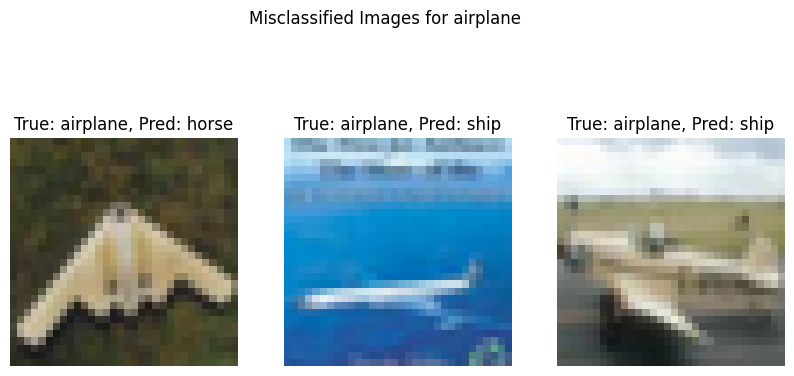

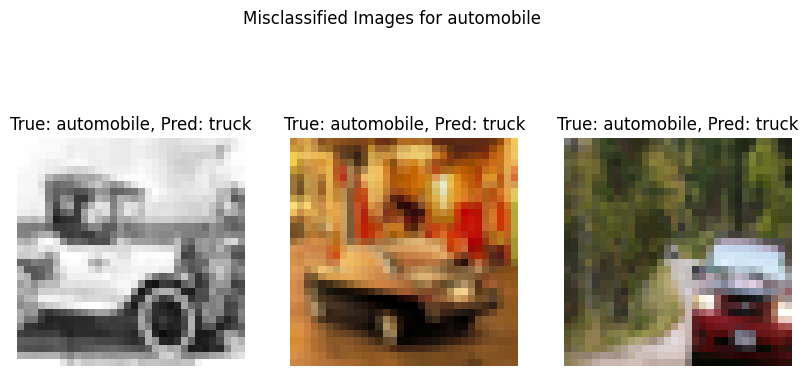

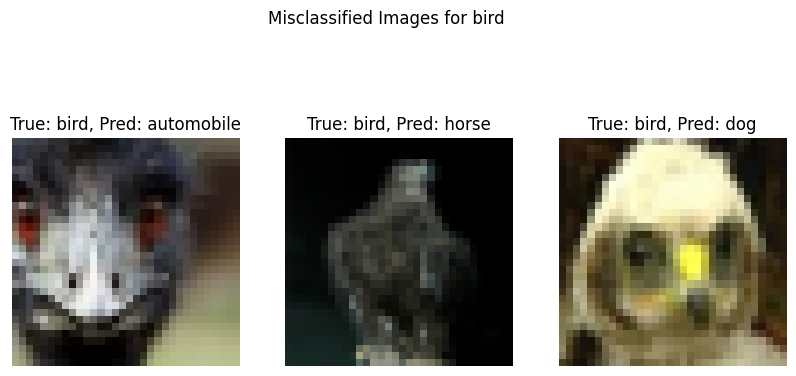

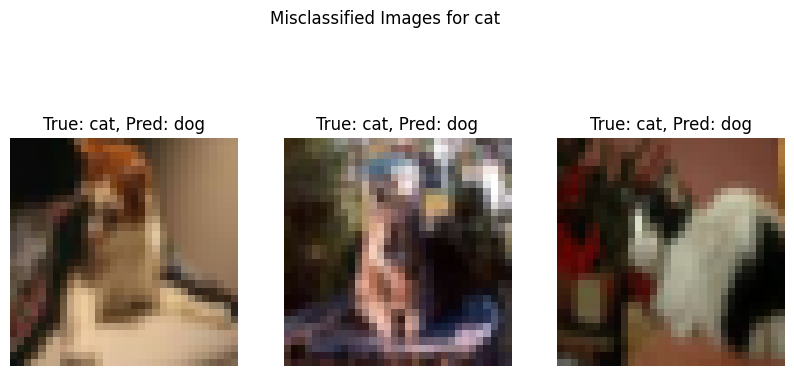

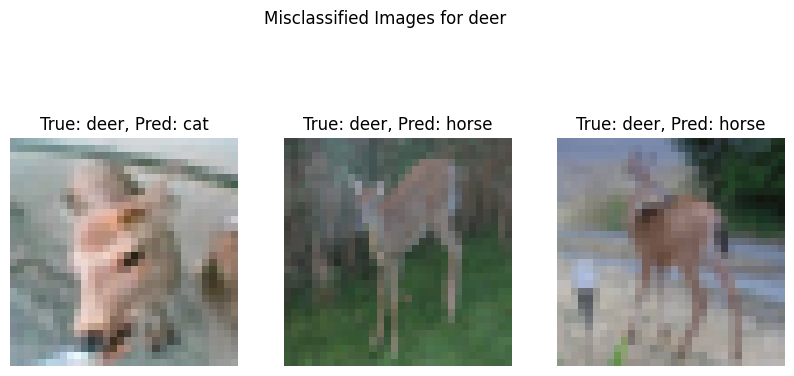

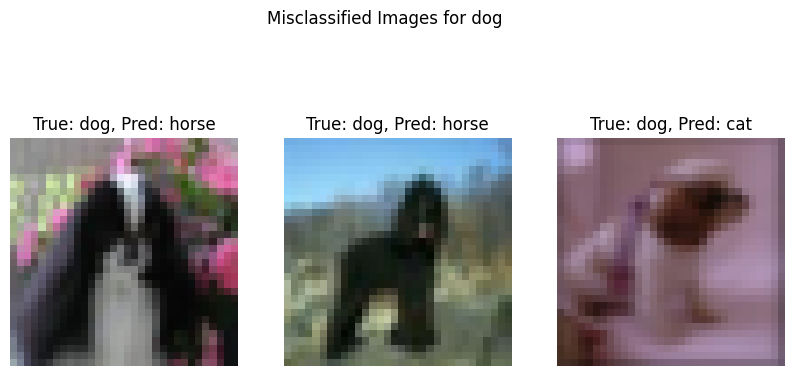

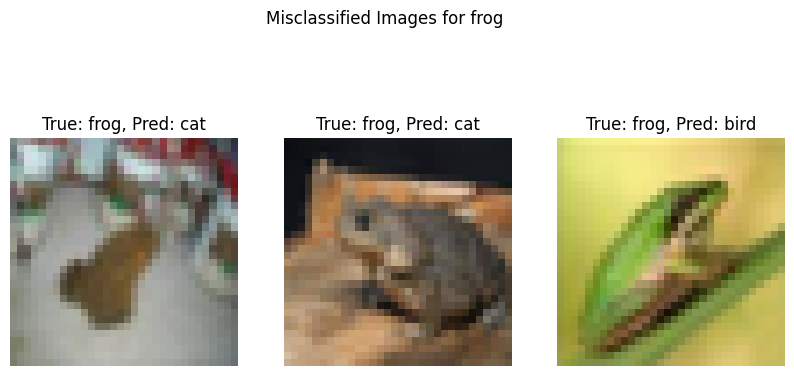

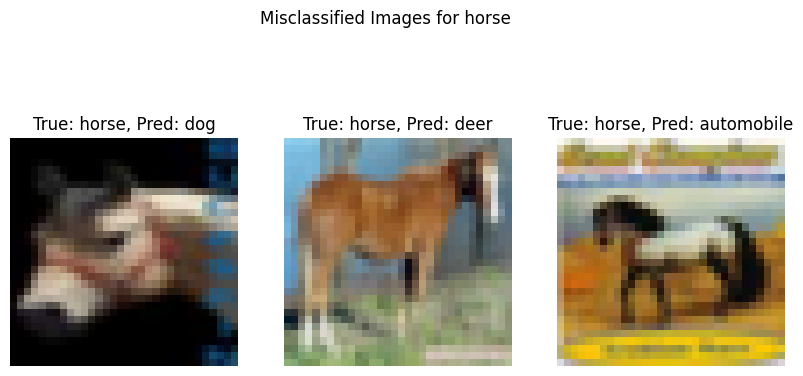

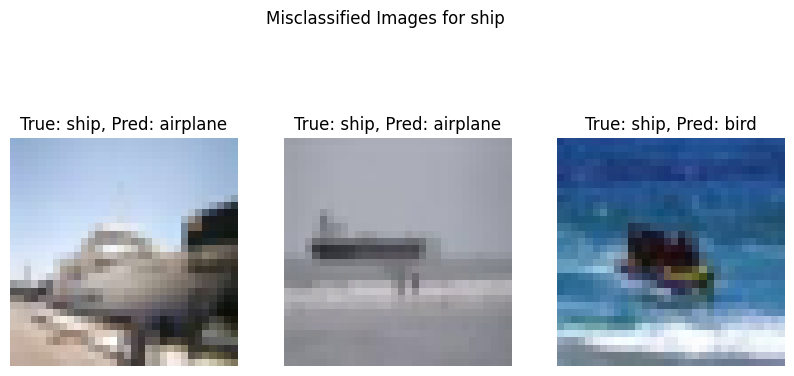

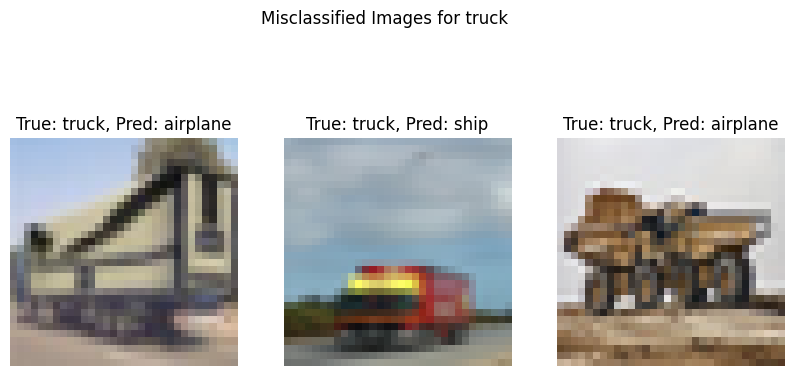

In [10]:
num_epochs = 200
loss_list = []
acc_list = []
train_acc_list = []

for epoch in range(num_epochs):
    net.train()
    correct_train = 0
    total_train = 0
    epoch_loss = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_accuracy = 100. * correct_train / total_train
    train_acc_list.append(train_accuracy)
    print(f'Epoch {epoch+1}: Loss: {epoch_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%')
    loss_list.append(epoch_loss/len(train_loader))

    net.eval()
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    misclassified_images = {i: [] for i in range(10)}
    misclassified_labels = {i: [] for i in range(10)}
    misclassified_preds = {i: [] for i in range(10)}

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

            # 誤分類のデータを保存
            misclassified_idx = (predicted != labels).cpu().numpy()
            for idx in range(len(labels)):
                if misclassified_idx[idx] and len(misclassified_images[labels[idx].item()]) < 3:
                    misclassified_images[labels[idx].item()].append(inputs[idx].cpu())
                    misclassified_labels[labels[idx].item()].append(labels[idx].cpu().item())
                    misclassified_preds[labels[idx].item()].append(predicted[idx].cpu().item())

    test_accuracy = 100. * correct / total
    acc_list.append(test_accuracy)
    print(f'Test Accuracy: {test_accuracy:.2f}%')

    # 混同行列の出力
    cm = confusion_matrix(y_true, y_pred)
    print(f'Confusion Matrix (Epoch {epoch+1}):')
    print(cm)

    # 最後のエポックのみ各クラスの誤った予測の画像を表示
    if epoch + 1 == num_epochs:
        for class_idx in range(10):
            if len(misclassified_images[class_idx]) > 0:
                fig, axes = plt.subplots(1, len(misclassified_images[class_idx]), figsize=(10, 5))
                fig.suptitle(f'Misclassified Images for {classes[class_idx]}')
                if len(misclassified_images[class_idx]) == 1:
                    axes = [axes]
                for idx, ax in enumerate(axes):
                    image = misclassified_images[class_idx][idx].permute(1, 2, 0) * 0.5 + 0.5  # データの正規化を戻す
                    label = misclassified_labels[class_idx][idx]
                    pred = misclassified_preds[class_idx][idx]

                    ax.imshow(image)
                    ax.set_title(f'True: {classes[label]}, Pred: {classes[pred]}')
                    ax.axis('off')
                plt.show()

    torch.save(net.state_dict(), f'Weight_Epoch{epoch+1}.pth')
    scheduler.step()

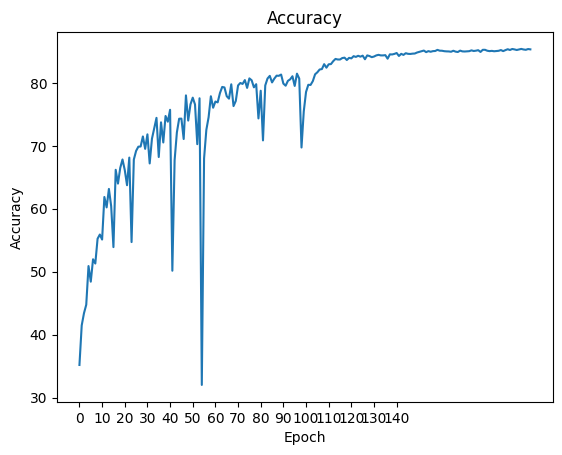

In [11]:
plt.plot(acc_list)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,200,20))
plt.ylabel('Accuracy')
plt.show()

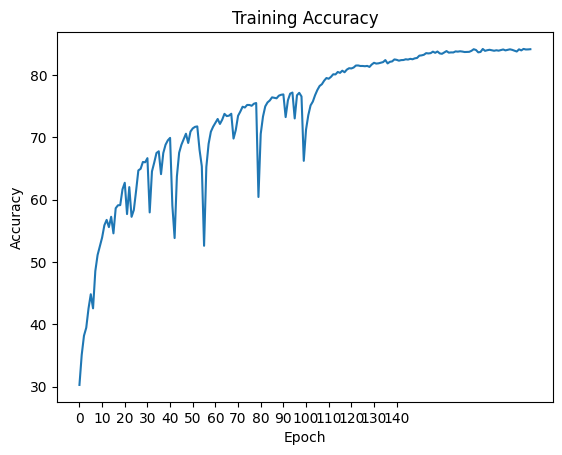

In [12]:
plt.plot(train_acc_list)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,200,20))
plt.ylabel('Accuracy')
plt.show()

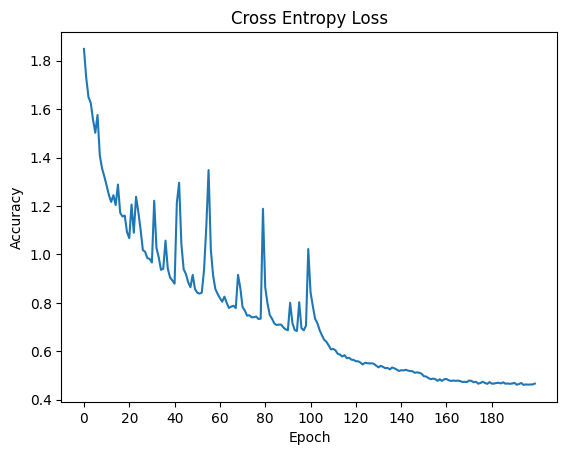

In [13]:
plt.plot(loss_list)
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,200,20))
plt.ylabel('Accuracy')
plt.show()